# Analysez des données de systèmes éducatifs

# EXO
Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4 000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site.

Pour la pré-analyse, pourrais-tu :

Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)
    Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

Merci !

# Préparation de l'environnement

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import re

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des librairies nécessaires pour le traitement des données

In [6]:
edstatsdata = pd.read_csv('Data\EdStatsData.csv', sep=',')

In [7]:
edstatsseries = pd.read_csv('Data\EdStatsSeries.csv', sep=',')

In [8]:
edstatscountry = pd.read_csv('Data\EdStatsCountry.csv', sep=',')

In [9]:
edstatscountryseries = pd.read_csv('Data\EdStatsCountry-Series.csv', sep=',')

In [98]:
edstatsfootnote = pd.read_csv('Data\EdStatsFootNote.csv', sep=',')

# Affichage des données pour mieux les comprendre

In [11]:
print(edstatsfootnote)

       CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633       Uncerta

In [12]:
print(edstatscountryseries)

    CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statistics South Africa, United...      

In [13]:
print(edstatscountry)

    Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
0             AW       

In [14]:
print(edstatsseries)

                      Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
...                              

In [15]:
print(edstatsdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [16]:
print(edstatsdata.isnull().sum())

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64


In [17]:
print(edstatsseries.isnull().sum())

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64


In [18]:
print(edstatscountry.isnull().sum())

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [19]:
print(edstatscountryseries.isnull().sum())

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64


In [20]:
print(edstatsfootnote.isnull().sum())

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64


# vérification des doublons dans les données

In [21]:
edstatsdata.loc[edstatsdata['Country Name'].duplicated(keep=False),:]

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       1970       1971       1972       1973  \
0                 UIS.NERA.2        NaN        NaN        NaN        NaN   
1               UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2             UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3               UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4                SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
...                      ...        ...        ...        ...        ...   
886925      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
886926     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

             1974      1975  ...  2060  2065  2070  2075  2080  2085  2090  \
0             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       57.991138  59.36554  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   
886925        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886926        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886927        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886928        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886929        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        2095  2100  Unnamed: 69  
0        NaN   NaN          NaN  
1        NaN   NaN          NaN  
2        NaN   NaN          NaN  
3        NaN   NaN          NaN  
4        NaN   NaN          NaN  
...      ...   ...          ...  
886925   NaN   NaN          NaN  
886926   NaN   NaN          NaN  
886927   NaN   NaN          NaN  
886928   NaN   NaN          NaN  
886929   NaN   NaN          NaN  

[886930 rows x 70 columns]

In [22]:
print(edstatsdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

# Affichage des pays

In [23]:
Countries=edstatsdata['Country Name'].unique()
print(Countries)

['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British

# Affichage des indicateurs

In [24]:
Indicator=edstatsdata['Indicator Name'].unique()
print(Indicator)

['Adjusted net enrolment rate, lower secondary, both sexes (%)'
 'Adjusted net enrolment rate, lower secondary, female (%)'
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)'
 ... 'Youth literacy rate, population 15-24 years, female (%)'
 'Youth literacy rate, population 15-24 years, gender parity index (GPI)'
 'Youth literacy rate, population 15-24 years, male (%)']


 # Sélection des indicateurs qui nous intéressent

In [25]:
ID_Indic = [2084,1375,1335,1339,1245,1251,3348,2533,2307,1260,1214,1204,1191,1201]

IndicatorsTrue = Indicator[ID_Indic]

print(IndicatorsTrue)

['Personal computers (per 100 people)' 'Internet users (per 100 people)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Gross enrolment ratio, tertiary, both sexes (%)'
 'GDP per capita (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'Unemployment, total (% of total labor force)' 'Population, total'
 'Population growth (annual %)'
 'Government expenditure on education as % of GDP (%)'
 'Enrolment in upper secondary education, both sexes (number)'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'Enrolment in secondary education, both sexes (number)'
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes']


In [26]:
Indicators = edstatsdata['Indicator Name'].unique()

print(Indicators.shape)

(3665,)


# Sélection des pays qui nous intéressent

In [27]:
CountriesTrue = Countries[25:]
print(CountriesTrue[:10])

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba']


# Sélection des données qui nous intéressent

In [99]:
edstatsdataTrue=edstatsdata[(edstatsdata['Country Name'].isin(CountriesTrue)) & (edstatsdata['Indicator Name'].isin(IndicatorsTrue))].copy()
print(edstatsdataTrue)

       Country Name Country Code  \
92816   Afghanistan          AFG   
92826   Afghanistan          AFG   
92829   Afghanistan          AFG   
92839   Afghanistan          AFG   
92870   Afghanistan          AFG   
...             ...          ...   
884640     Zimbabwe          ZWE   
885349     Zimbabwe          ZWE   
885572     Zimbabwe          ZWE   
885798     Zimbabwe          ZWE   
886613     Zimbabwe          ZWE   

                                           Indicator Name    Indicator Code  \
92816   Enrolment in secondary education, both sexes (...       SE.SEC.ENRL   
92826   Enrolment in tertiary education per 100,000 in...  UIS.TE_100000.56   
92829   Enrolment in tertiary education, all programme...       SE.TER.ENRL   
92839   Enrolment in upper secondary education, both s...           UIS.E.3   
92870                        GDP per capita (current US$)    NY.GDP.PCAP.CD   
...                                                   ...               ...   
884640        

# Affichage des indicateurs et des pays qui nous intéressent

In [29]:
print(edstatsdataTrue['Indicator Name'].unique())
print('///////////////////////////////////////////////')
print(edstatsdataTrue['Country Name'].unique())

['Enrolment in secondary education, both sexes (number)'
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes'
 'Enrolment in tertiary education, all programmes, both sexes (number)'
 'Enrolment in upper secondary education, both sexes (number)'
 'GDP per capita (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'Government expenditure on education as % of GDP (%)'
 'Gross enrolment ratio, secondary, both sexes (%)'
 'Gross enrolment ratio, tertiary, both sexes (%)'
 'Internet users (per 100 people)' 'Personal computers (per 100 people)'
 'Population growth (annual %)' 'Population, total'
 'Unemployment, total (% of total labor force)']
///////////////////////////////////////////////
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'B

In [100]:
ColumnsToKeep=["Country Name","Country Code","Indicator Name","Indicator Code","2012","2013","2014","2015","2016","2017"]
edstatsdataTrue = edstatsdataTrue[ColumnsToKeep]
#Jusqu'à 2016 CAR  NUL à partir de 2017
print(edstatsdataTrue)

       Country Name Country Code  \
92816   Afghanistan          AFG   
92826   Afghanistan          AFG   
92829   Afghanistan          AFG   
92839   Afghanistan          AFG   
92870   Afghanistan          AFG   
...             ...          ...   
884640     Zimbabwe          ZWE   
885349     Zimbabwe          ZWE   
885572     Zimbabwe          ZWE   
885798     Zimbabwe          ZWE   
886613     Zimbabwe          ZWE   

                                           Indicator Name    Indicator Code  \
92816   Enrolment in secondary education, both sexes (...       SE.SEC.ENRL   
92826   Enrolment in tertiary education per 100,000 in...  UIS.TE_100000.56   
92829   Enrolment in tertiary education, all programme...       SE.TER.ENRL   
92839   Enrolment in upper secondary education, both s...           UIS.E.3   
92870                        GDP per capita (current US$)    NY.GDP.PCAP.CD   
...                                                   ...               ...   
884640        

In [31]:
edstatsdataTrue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 92816 to 886613
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3038 non-null   object 
 1   Country Code    3038 non-null   object 
 2   Indicator Name  3038 non-null   object 
 3   Indicator Code  3038 non-null   object 
 4   2012            2172 non-null   float64
 5   2013            2117 non-null   float64
 6   2014            2007 non-null   float64
 7   2015            1693 non-null   float64
 8   2016            1208 non-null   float64
 9   2017            0 non-null      float64
dtypes: float64(6), object(4)
memory usage: 261.1+ KB


In [102]:

edstatsdataTrue['Value'] = edstatsdataTrue['2016']

for n in range(5,1,-1): 
    column=edstatsdataTrue.columns.values[n]
    print(column) 
    edstatsdataTrue['Value'] = edstatsdataTrue['Value'].fillna(edstatsdataTrue[column]) 

for n in range(7,3,-1): 
    column=edstatsdataTrue.columns.values[n]
    print(column) 
    edstatsdataTrue['Value'] = edstatsdataTrue['Value'].fillna(edstatsdataTrue[column])
    
    edstatsdataTrue=edstatsdataTrue.drop(columns=['2012','2013','2014', '2015','2016'])

KeyError: '2016'

In [33]:
DataPivot = edstatsdataTrue.pivot_table(index='Country Name', columns='Indicator Name', values='Value').reset_index()

DataPivot

Indicator Name           Country Name  \
0                         Afghanistan   
1                             Albania   
2                             Algeria   
3                      American Samoa   
4                             Andorra   
..                                ...   
212             Virgin Islands (U.S.)   
213                West Bank and Gaza   
214                       Yemen, Rep.   
215                            Zambia   
216                          Zimbabwe   

Indicator Name  Enrolment in secondary education, both sexes (number)  \
0                                                       2698816.0       
1                                                        315079.0       
2                                                             NaN       
3                                                             NaN       
4                                                          4395.0       
..                                                            ...       
212                                                           NaN       
213                                                      721414.0       
214                                                     1768102.0       
215                                                           NaN       
216                                                      957461.0       

Indicator Name  Enrolment in tertiary education per 100,000 inhabitants, both sexes  \
0                                                      831.156250                     
1                                                     6015.172852                     
2                                                     3198.919434                     
3                                                             NaN                     
4                                                             NaN                     
..                                                            ...                     
212                                                           NaN                     
213                                                   4710.088379                     
214                                                           NaN                     
215                                                           NaN                     
216                                                    631.725220                     

Indicator Name  Enrolment in tertiary education, all programmes, both sexes (number)  \
0                                                        262874.0                      
1                                                        160527.0                      
2                                                       1289474.0                      
3                                                             NaN                      
4                                                           501.0                      
..                                                            ...                      
212                                                           NaN                      
213                                                      221018.0                      
214                                                           NaN                      
215                                                       56680.0                      
216                                                      135575.0                      

Indicator Name  Enrolment in upper secondary education, both sexes (number)  \
0                                                        968769.0             
1                                                        151937.0             
2                                                             NaN             
3                                                             NaN             
4                                                          1288.0             
..                                                    

In [34]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 14 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          217 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 178 non-null    float64
 2   Enrolment in tertiary education per 100,000 inhabitants, both sexes   148 non-null    float64
 3   Enrolment in tertiary education, all programmes, both sexes (number)  163 non-null    float64
 4   Enrolment in upper secondary education, both sexes (number)           172 non-null    float64
 5   GDP per capita (current US$)                                          200 non-null    float64
 6   GNI per capita, Atlas method (current US$)                            189 non-null    float64
 7  

In [35]:
ColumnsToKeep=["Country Name",
               "Enrolment in secondary education, both sexes (number)",
               "Enrolment in tertiary education, all programmes, both sexes (number)",
               "GDP per capita (current US$)",
               "Government expenditure on education as % of GDP (%)",
               "Internet users (per 100 people)",
               "Population growth (annual %)",
               "Population, total",
               "Unemployment, total (% of total labor force)",
               ]

DataPivot = DataPivot[ColumnsToKeep].copy()

In [36]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          217 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 178 non-null    float64
 2   Enrolment in tertiary education, all programmes, both sexes (number)  163 non-null    float64
 3   GDP per capita (current US$)                                          200 non-null    float64
 4   Government expenditure on education as % of GDP (%)                   141 non-null    float64
 5   Internet users (per 100 people)                                       203 non-null    float64
 6   Population growth (annual %)                                          214 non-null    float64
 7   

In [37]:
DataPivot.isna().sum()

Indicator Name
Country Name                                                             0
Enrolment in secondary education, both sexes (number)                   39
Enrolment in tertiary education, all programmes, both sexes (number)    54
GDP per capita (current US$)                                            17
Government expenditure on education as % of GDP (%)                     76
Internet users (per 100 people)                                         14
Population growth (annual %)                                             3
Population, total                                                        3
Unemployment, total (% of total labor force)                            31
dtype: int64

In [38]:
DataPivot.loc[~DataPivot.index.isin(DataPivot.dropna(thresh=6).index),  'Country Name']

3                 American Samoa
27        British Virgin Islands
36                Cayman Islands
39               Channel Islands
61                       Eritrea
64                 Faroe Islands
68              French Polynesia
74                     Gibraltar
76                     Greenland
93                   Isle of Man
101                     Kiribati
104                       Kosovo
112                        Libya
137                        Nauru
140                New Caledonia
145     Northern Mariana Islands
171    Sint Maarten (Dutch part)
182     St. Martin (French part)
Name: Country Name, dtype: object

In [39]:
DataPivot.dropna(thresh=6,inplace=True)
DataPivot.reset_index(drop=True, inplace=True)

In [40]:
DataPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          199 non-null    object 
 1   Enrolment in secondary education, both sexes (number)                 173 non-null    float64
 2   Enrolment in tertiary education, all programmes, both sexes (number)  160 non-null    float64
 3   GDP per capita (current US$)                                          193 non-null    float64
 4   Government expenditure on education as % of GDP (%)                   140 non-null    float64
 5   Internet users (per 100 people)                                       194 non-null    float64
 6   Population growth (annual %)                                          199 non-null    float64
 7   

 # Analyse des données et visualisation des données

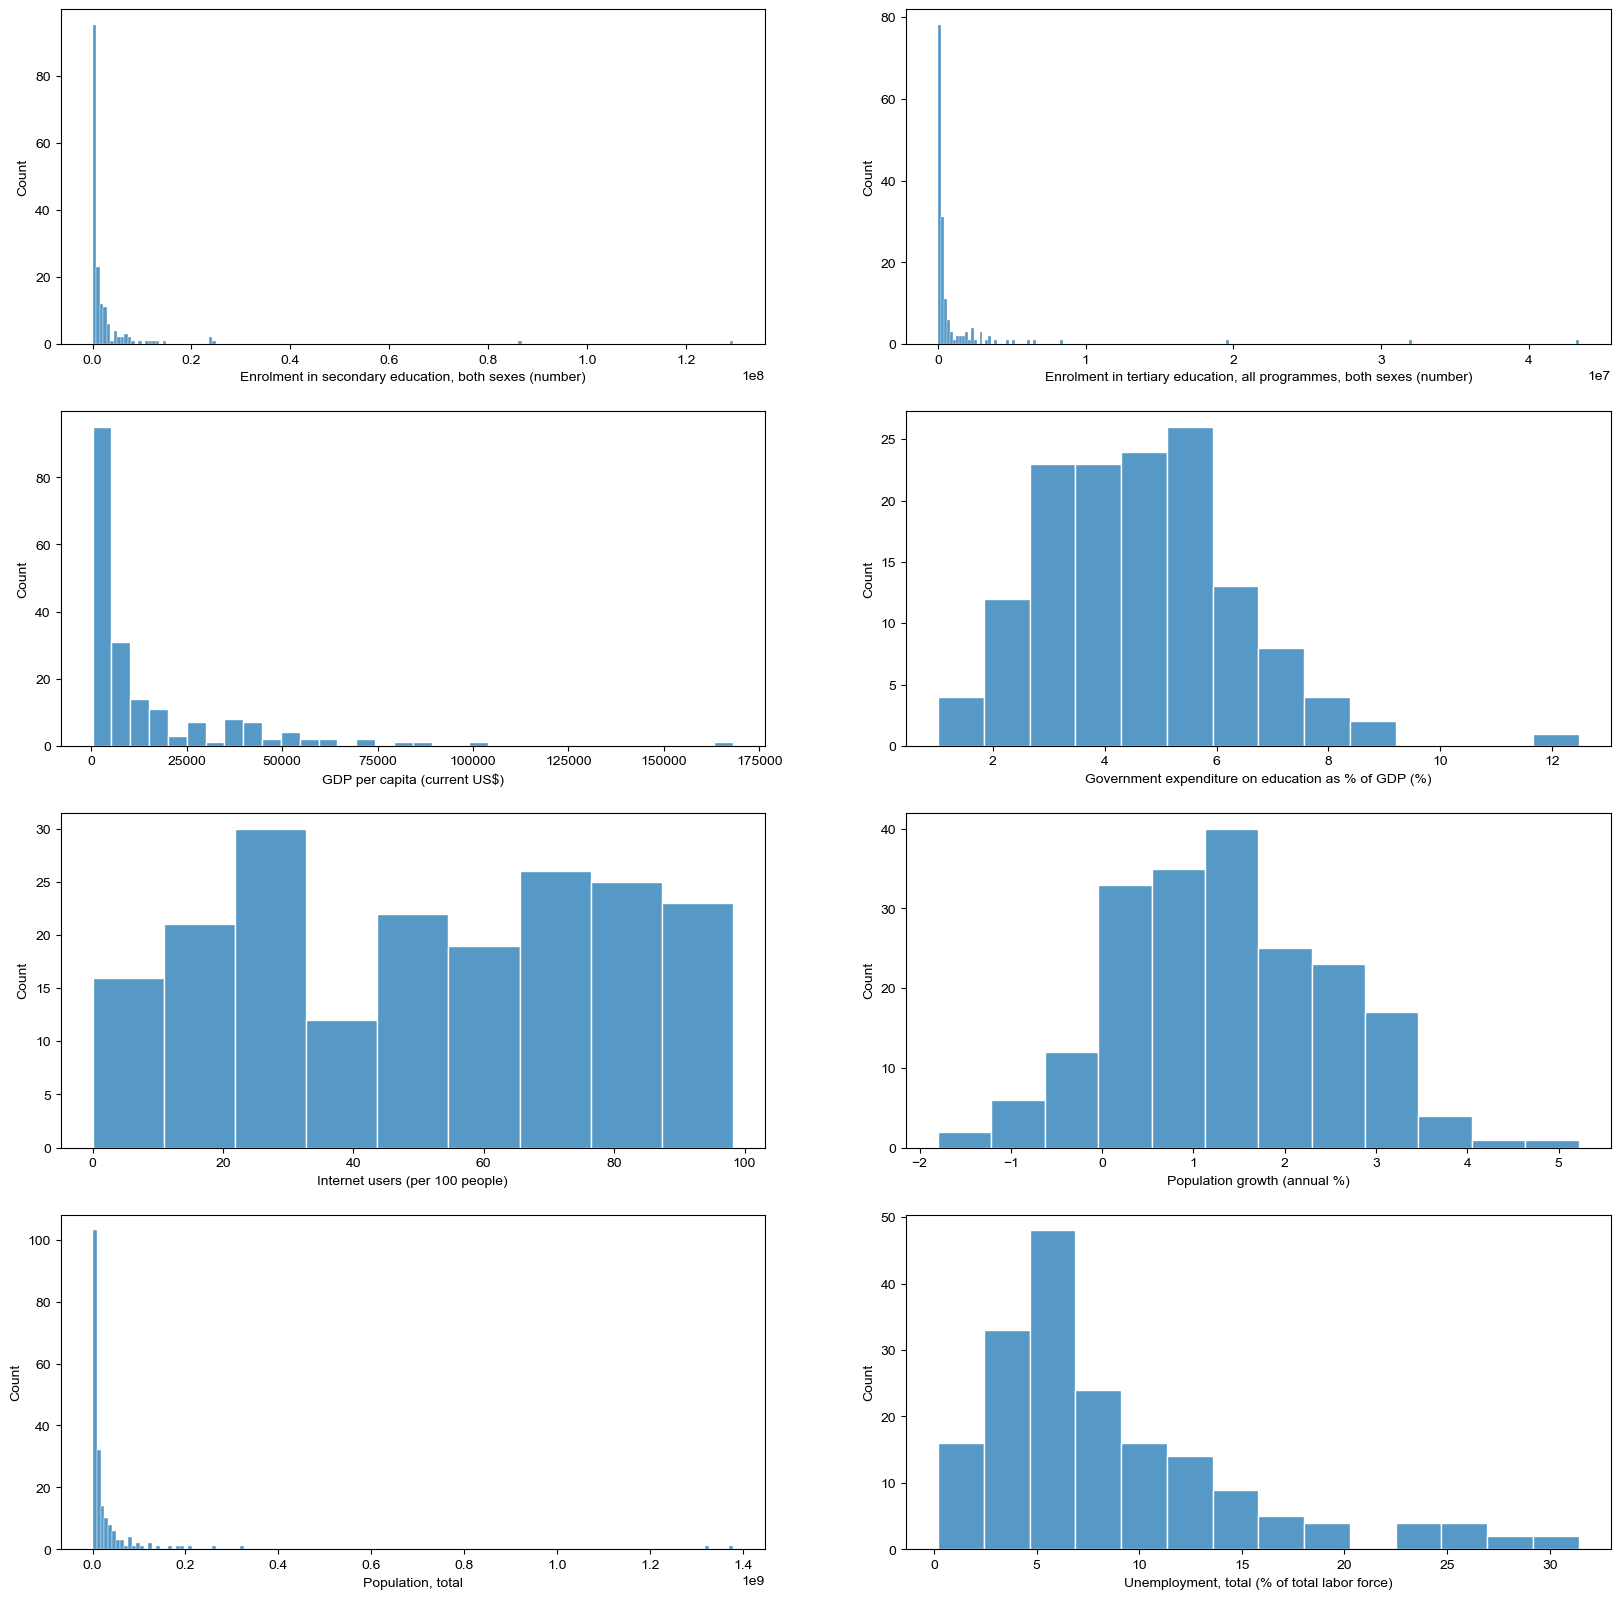

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 20)
fig, axes = plt.subplots(4, 2)

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0, 0], data=DataPivot, x="Enrolment in secondary education, both sexes (number)")
sns.histplot(ax=axes[0, 1], data=DataPivot, x="Enrolment in tertiary education, all programmes, both sexes (number)")
sns.histplot(ax=axes[1, 0], data=DataPivot, x="GDP per capita (current US$)")
sns.histplot(ax=axes[1, 1], data=DataPivot, x="Government expenditure on education as % of GDP (%)")
sns.histplot(ax=axes[2, 0], data=DataPivot, x="Internet users (per 100 people)")
sns.histplot(ax=axes[2, 1], data=DataPivot, x="Population growth (annual %)")
sns.histplot(ax=axes[3, 0], data=DataPivot, x="Population, total")
sns.histplot(ax=axes[3, 1], data=DataPivot, x="Unemployment, total (% of total labor force)")

plt.show()

# Transformation des données en log pour s'approcher d'une distribution suivant une loi normal

In [42]:
DataPivot["Enrolment in secondary education, both sexes (number)"] =np.log(DataPivot["Enrolment in secondary education, both sexes (number)"])
DataPivot["Enrolment in tertiary education, all programmes, both sexes (number)"] =np.log(DataPivot["Enrolment in tertiary education, all programmes, both sexes (number)"])
DataPivot["GDP per capita (current US$)"] =np.log(DataPivot["GDP per capita (current US$)"])
DataPivot["Population, total"] =np.log(DataPivot["Population, total"])




DataPivot.rename(columns={"Enrolment in secondary education, both sexes (number)" : "log(Enrolment in secondary education (number))",
                           "Enrolment in tertiary education, all programmes, both sexes (number)" : "log(Enrolment in tertiary education (number))",
                           "GDP per capita (current US$)" : "log(GDP per capita (current US$))",
                           "Population, total": "log(Population, total)"
                           }, inplace=True)


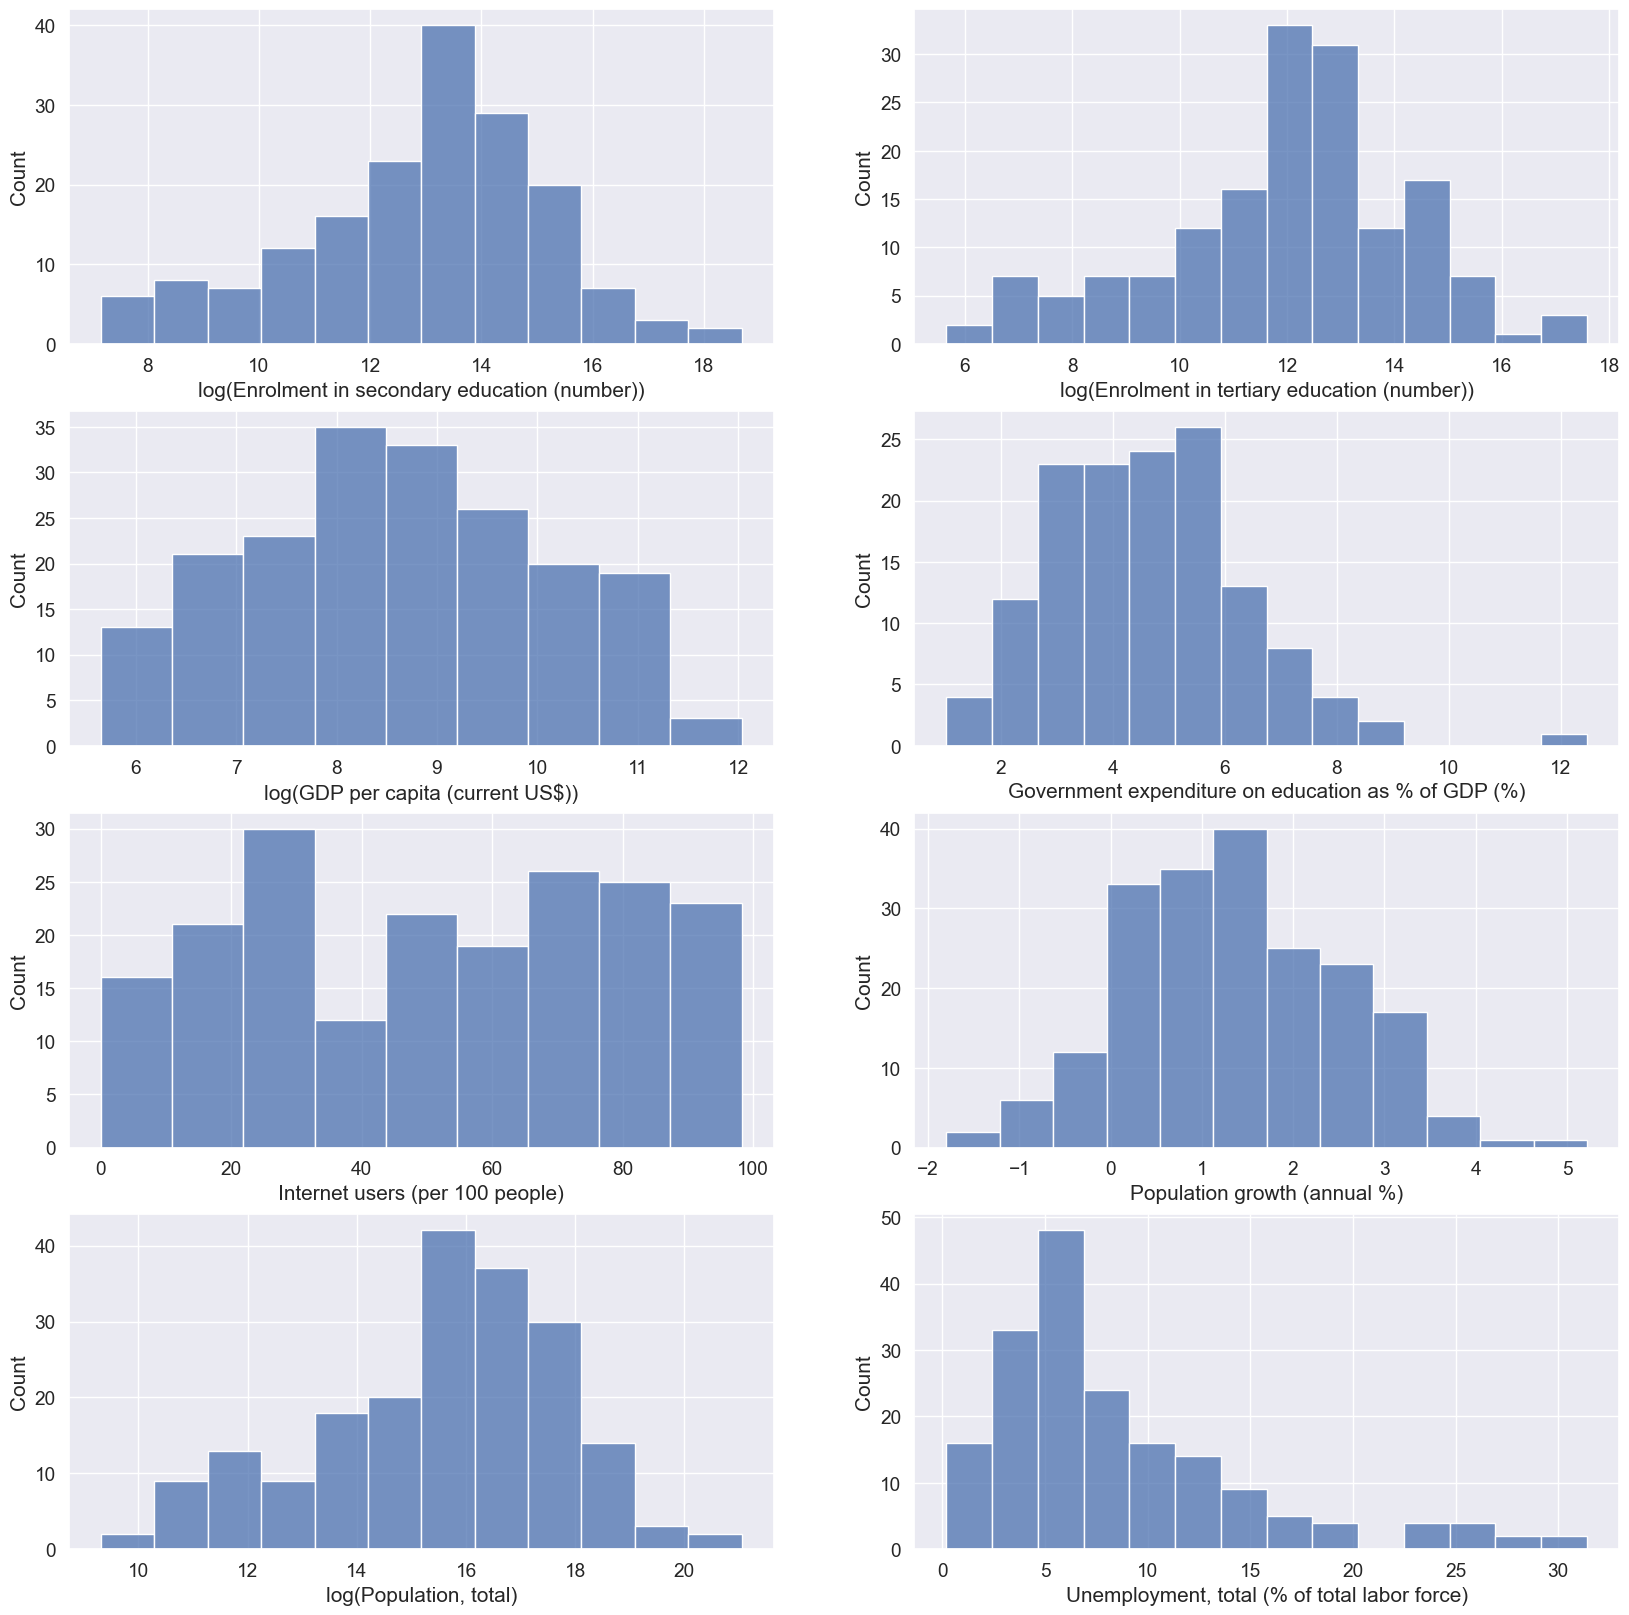

In [43]:
# Représentation des histogrammes pour chacune des variables après transformation avec visualisation des données. 

plt.rcParams["figure.figsize"] = (20,20)
fig, axes = plt.subplots(4,2)

sns.set(font_scale=1.25)
sns.histplot(ax=axes[0,0],data=DataPivot, x="log(Enrolment in secondary education (number))")
sns.histplot(ax=axes[0,1],data=DataPivot, x="log(Enrolment in tertiary education (number))")
sns.histplot(ax=axes[1,0],data=DataPivot, x="log(GDP per capita (current US$))")
sns.histplot(ax=axes[1,1],data=DataPivot, x="Government expenditure on education as % of GDP (%)")
sns.histplot(ax=axes[2,0],data=DataPivot, x="Internet users (per 100 people)")
sns.histplot(ax=axes[2,1],data=DataPivot, x="Population growth (annual %)")
sns.histplot(ax=axes[3,0],data=DataPivot, x="log(Population, total)")
sns.histplot(ax=axes[3,1],data=DataPivot, x="Unemployment, total (% of total labor force)")


#fig.tight_layout()

plt.show()

C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


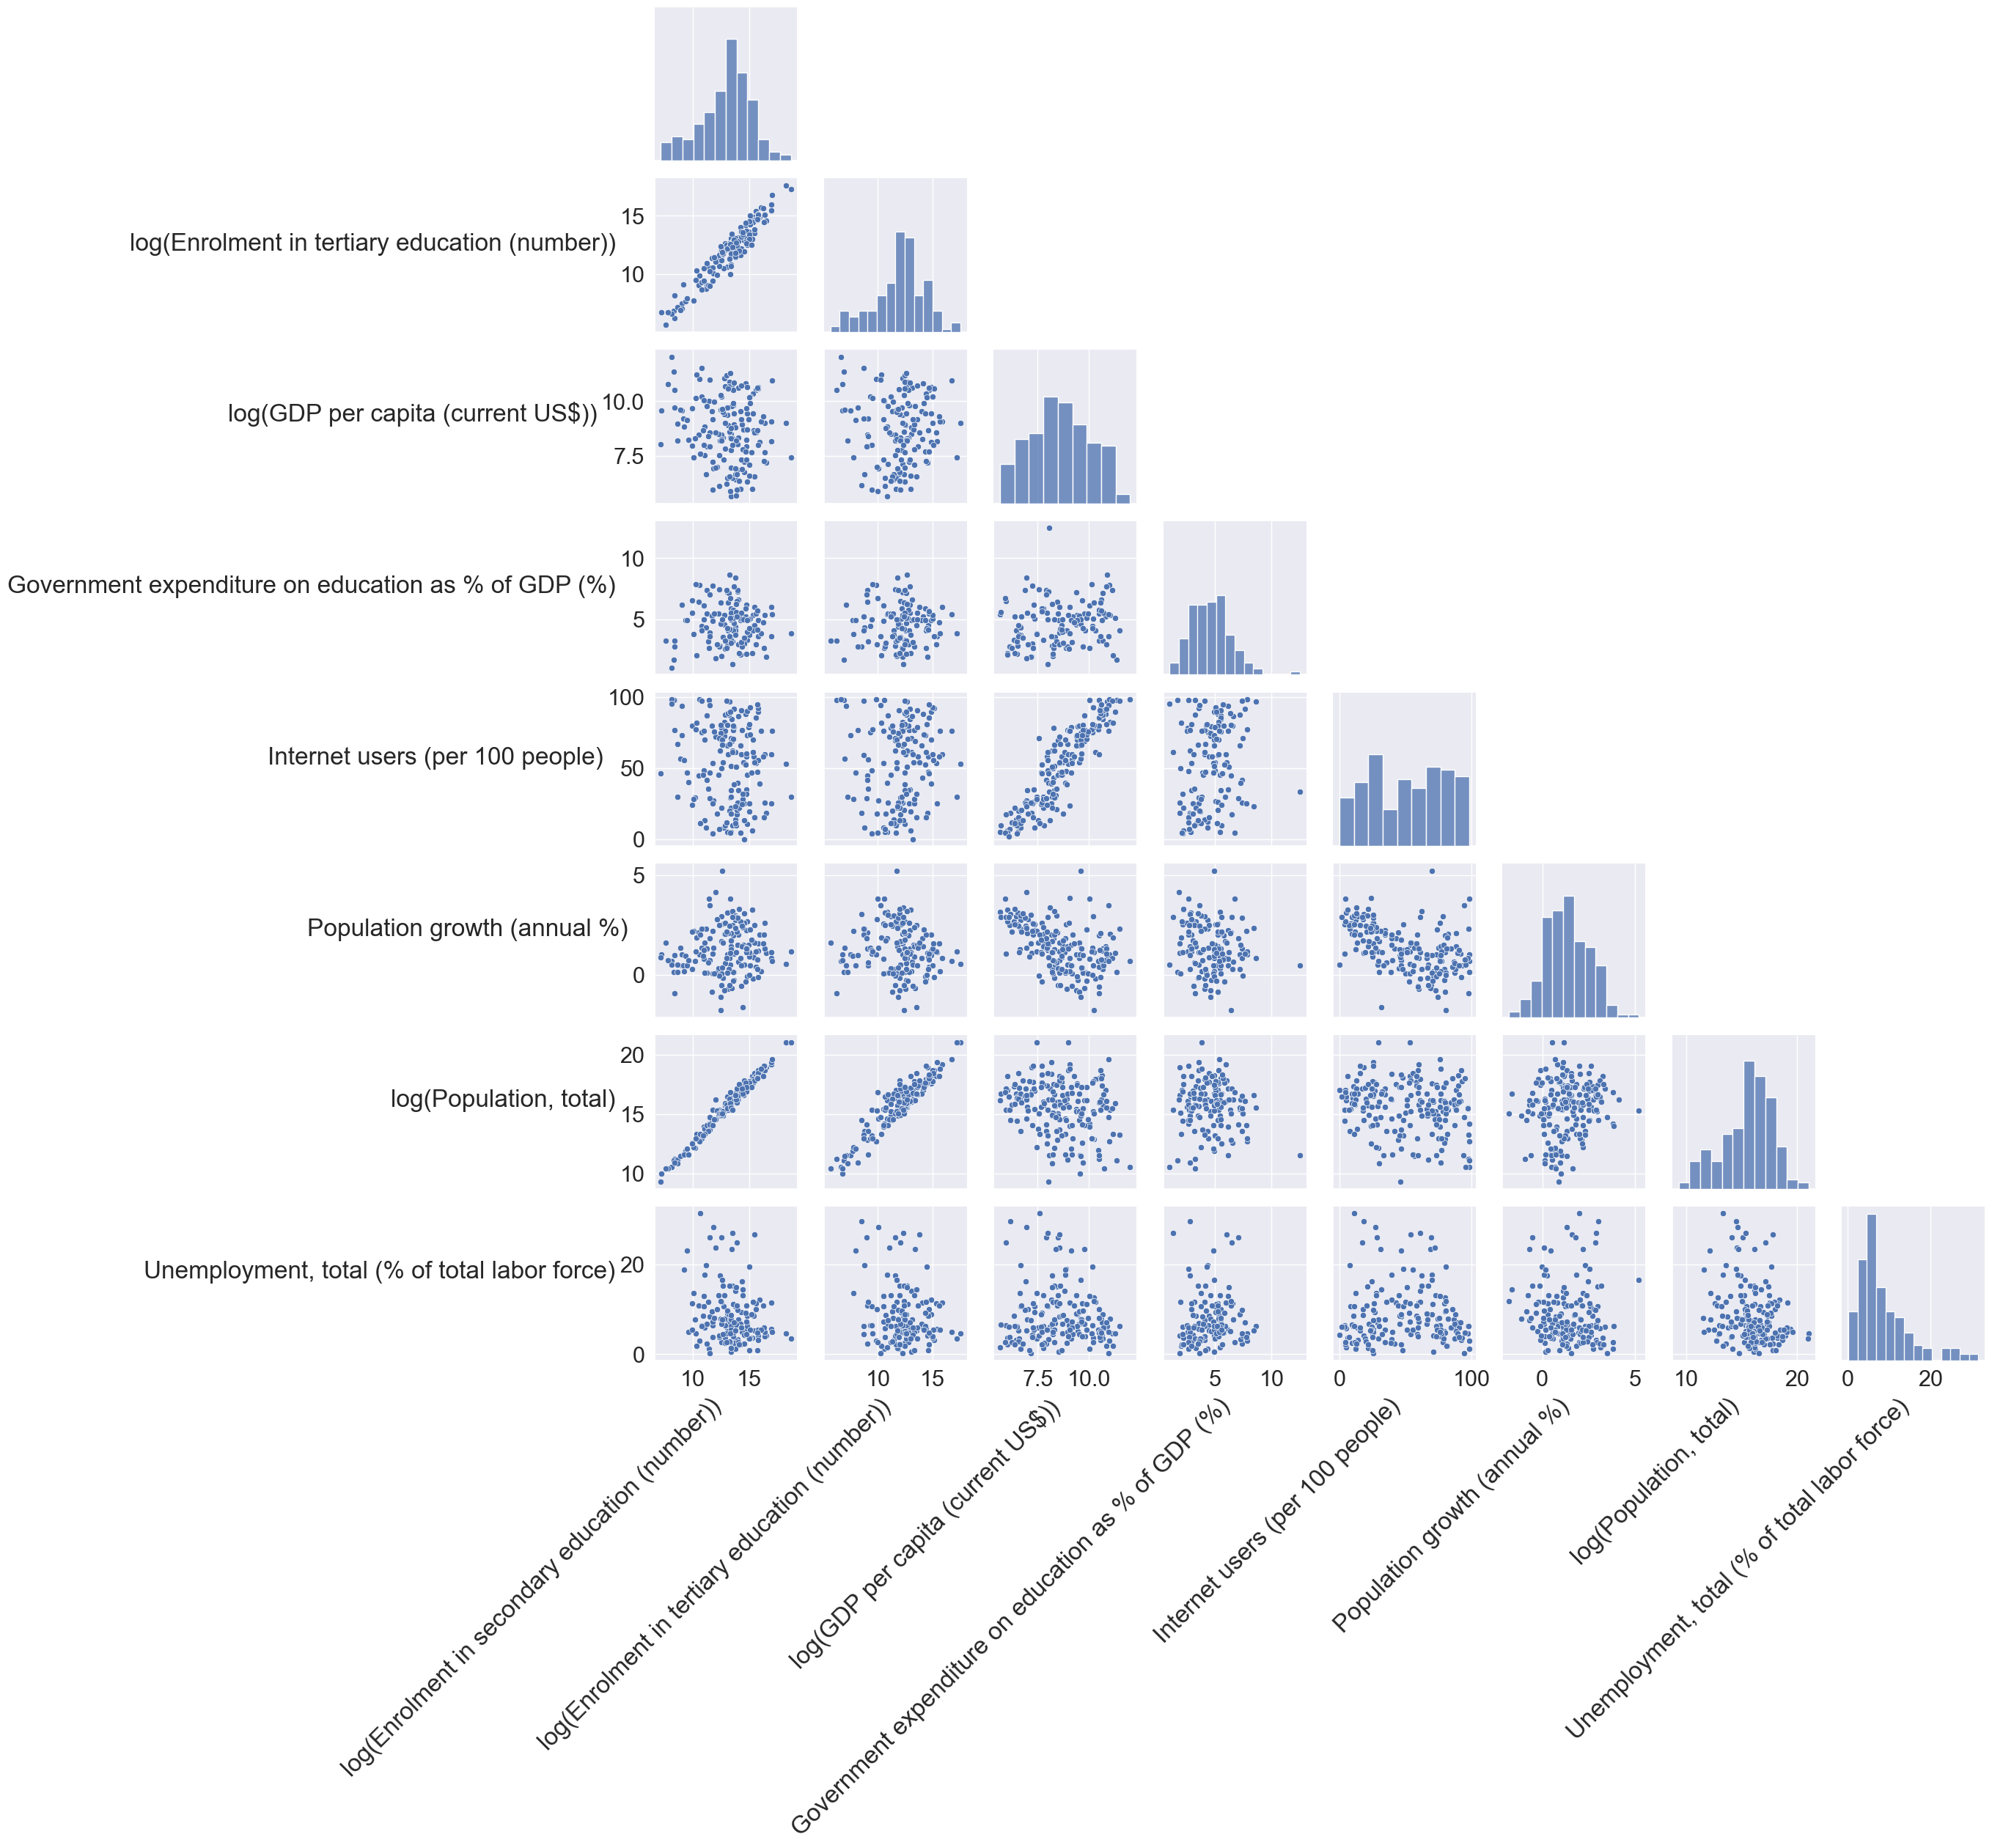

In [44]:
sns.set(font_scale=2)

g = sns.pairplot(DataPivot[DataPivot.columns.drop(['Country Name'])], corner=True)

g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

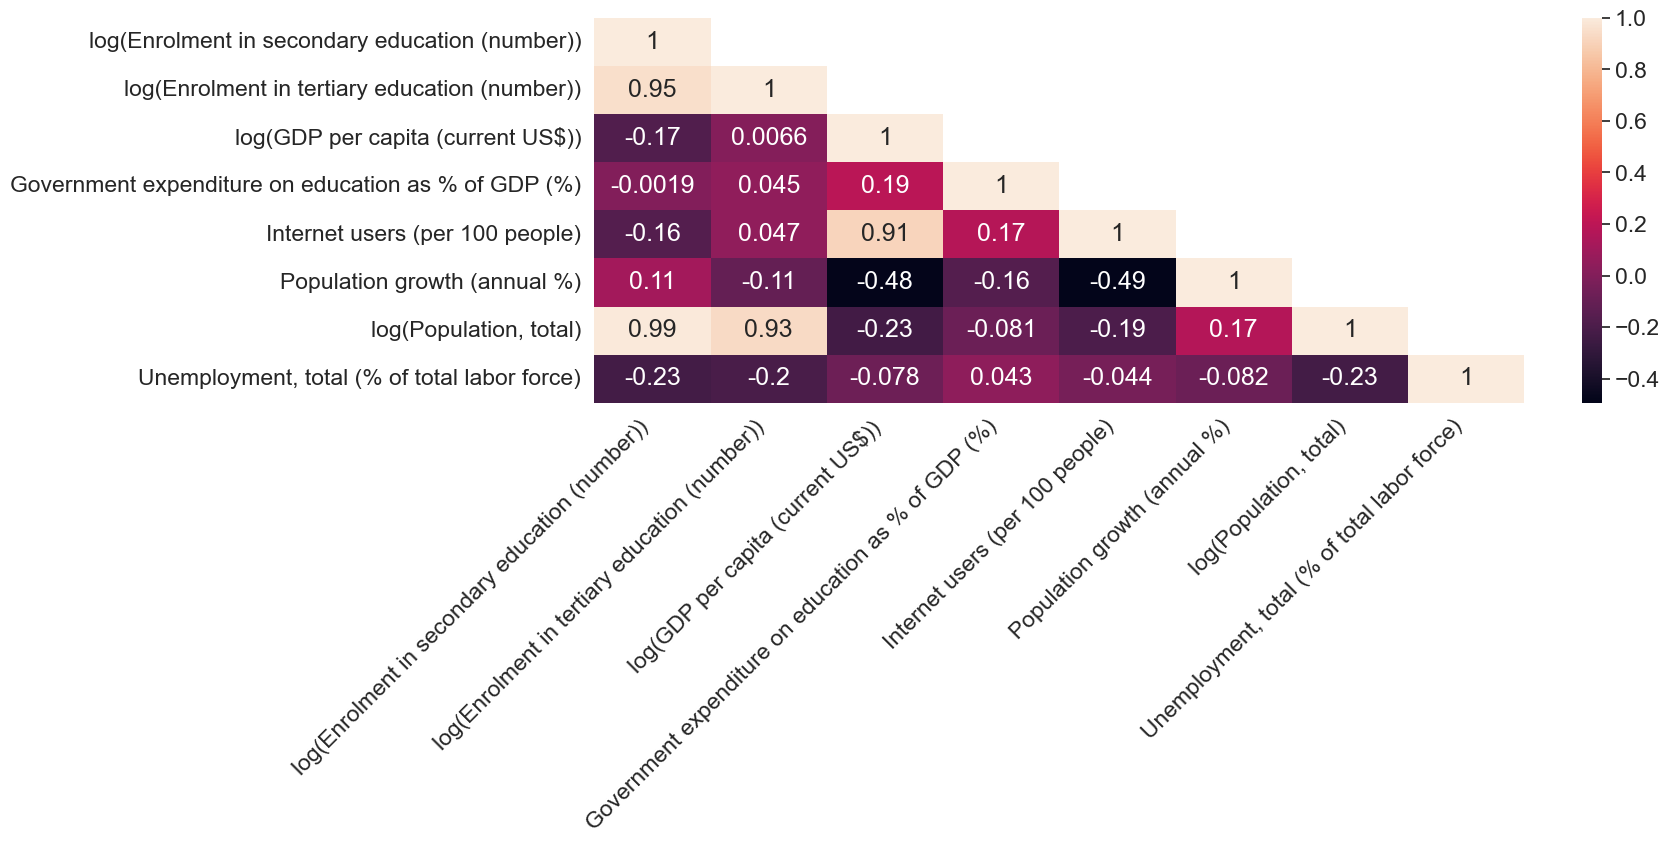

In [45]:
corr = DataPivot[DataPivot.columns.drop(['Country Name'])].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

plt.rcParams["figure.figsize"] = (15,5)

sns.set(font_scale=1.5,style='white')
hm = sns.heatmap(corr, annot = True,mask=mask)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
hm.set(xlabel=None,ylabel=None)
plt.show()

In [46]:
#Remplissage des nan par la méthode de l'iterative_imputer. 
#Cet algorithme effectue une régression linéaire pour chaque variable en fonction de toutes les autres afin de prédire les valeurs manquantes. 

#Chargement des librairies
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Chargement de l'imputer
imputer = IterativeImputer(max_iter=100, random_state=0)

#Ajustement de l'imputer avec les données (détermination des paramètres pour chaque variable)
imputer.fit(DataPivot[DataPivot.columns.drop(['Country Name'])])

#Création d'un jeu de donnée qui prend les données d'origines puis remplace les nan par leur valeur prédite. 
DataPivot_imp = pd.DataFrame(imputer.transform(DataPivot[DataPivot.columns.drop(['Country Name'])]),columns = DataPivot[DataPivot.columns.drop(['Country Name'])].columns)

# Rajout de la colonne Country Name 

DataPivot_imp['Country Name']=DataPivot['Country Name']


In [47]:
# Reformattage des variables transformées en log dans leur dimension d'origine. 
# Addition des valeurs du secondaire et du tertiaire pour différents indicateurs afin de ne garder que le total des étudiants cibles.

DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] = np.exp(DataPivot_imp["log(Enrolment in secondary education (number))"]) + np.exp(DataPivot_imp["log(Enrolment in tertiary education (number))"])
DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] = np.log(DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"])


DataPivot_imp=DataPivot_imp.drop(columns=["log(Enrolment in secondary education (number))",
                                          "log(Enrolment in tertiary education (number))"])



In [48]:
DataPivot_imp

Indicator Name  log(GDP per capita (current US$))  \
0                                        6.331108   
1                                        8.324817   
2                                        8.273051   
3                                       10.518366   
4                                        8.104311   
..                                            ...   
194                                     10.500972   
195                                      7.987322   
196                                      6.898043   
197                                      7.146436   
198                                      6.936417   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                        3.317540     
1                                                        3.539440     
2                                                        4.543740     
3                                                        3.253680     
4                                                        4.279432     
..                                                            ...     
194                                                      4.690134     
195                                                      1.322320     
196                                                      4.391766     
197                                                      4.389015     
198                                                      8.429330     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
0                                     10.595726                      2.689163   
1                                     66.363445                     -0.159880   
2                                     42.945527                      1.825463   
3                                     97.930637                     -0.944017   
4                                     13.000000                      3.367572   
..                                          ...                           ...   
194                                   59.608316                     -0.603319   
195                                   61.178385                      2.884693   
196                                   24.579208                      2.451502   
197                                   25.506579                      3.002816   
198                                   23.119989                      2.336070   

Indicator Name  log(Population, total)  \
0                            17.360982   
1                            14.871946   
2                            17.519428   
3                            11.255203   
4                            17.176353   
..                                 ...   
194                          11.542008   
195                          15.330982   
196                          17.132754   
197                          16.624394   
198                          16.597453   

Indicator Name  Unemployment, total (% of total labor force)  \
0                                                   8.600000   
1                                                  15.200000   
2                                                  11.500000   
3                                                  11.227232   
4                                                   6.100000   
..                                                       ...   
194                                                 8.000000   
195                                                27.000000   
196                                                16.200001   
197                                                 7.600000   
198                                                 5.200000   

Indicator Name           Country Name  \
0                         Afghanistan   
1                             Albania   
2                             Algeria   
3                             Andorra   
4                              Angola   
..               

In [49]:
# La commande Describe permet d'obtenir les grandeurs statistiques générales par indicateurs
DataPivot_imp.describe()

Indicator Name  log(GDP per capita (current US$))  \
count                                  199.000000   
mean                                     8.639458   
std                                      1.486919   
min                                      5.655038   
25%                                      7.576678   
50%                                      8.572553   
75%                                      9.715128   
max                                     12.032588   

Indicator Name  Government expenditure on education as % of GDP (%)  \
count                                                  199.000000     
mean                                                     4.612734     
std                                                      1.489992     
min                                                      1.021950     
25%                                                      3.851845     
50%                                                      4.612500     
75%                                                      5.228745     
max                                                     12.467750     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
count                                199.000000                    199.000000   
mean                                  51.118948                      1.341010   
std                                   28.302628                      1.172993   
min                                    0.000000                     -1.797539   
25%                                   25.436440                      0.496369   
50%                                   53.226773                      1.239581   
75%                                   76.143368                      2.205337   
max                                   98.240016                      5.217721   

Indicator Name  log(Population, total)  \
count                       199.000000   
mean                         15.503159   
std                           2.245098   
min                           9.314430   
25%                          14.148220   
50%                          15.844497   
75%                          17.090889   
max                          21.044381   

Indicator Name  Unemployment, total (% of total labor force)  \
count                                             199.000000   
mean                                                8.807772   
std                                                 6.109392   
min                                                 0.200000   
25%                                                 4.700000   
50%                                                 7.000000   
75%                                                11.300946   
max                                                31.400000   

Indicator Name  log(Enrolment in Sec. and Ter. education (number))  
count                                                  199.000000   
mean                                                    13.199678   
std                                                      2.244332   
min                                                      7.314267   
25%                                                     11.792348   
50%                                                     13.563433   
75%                                                     14.736108   
max                                                     18.900941

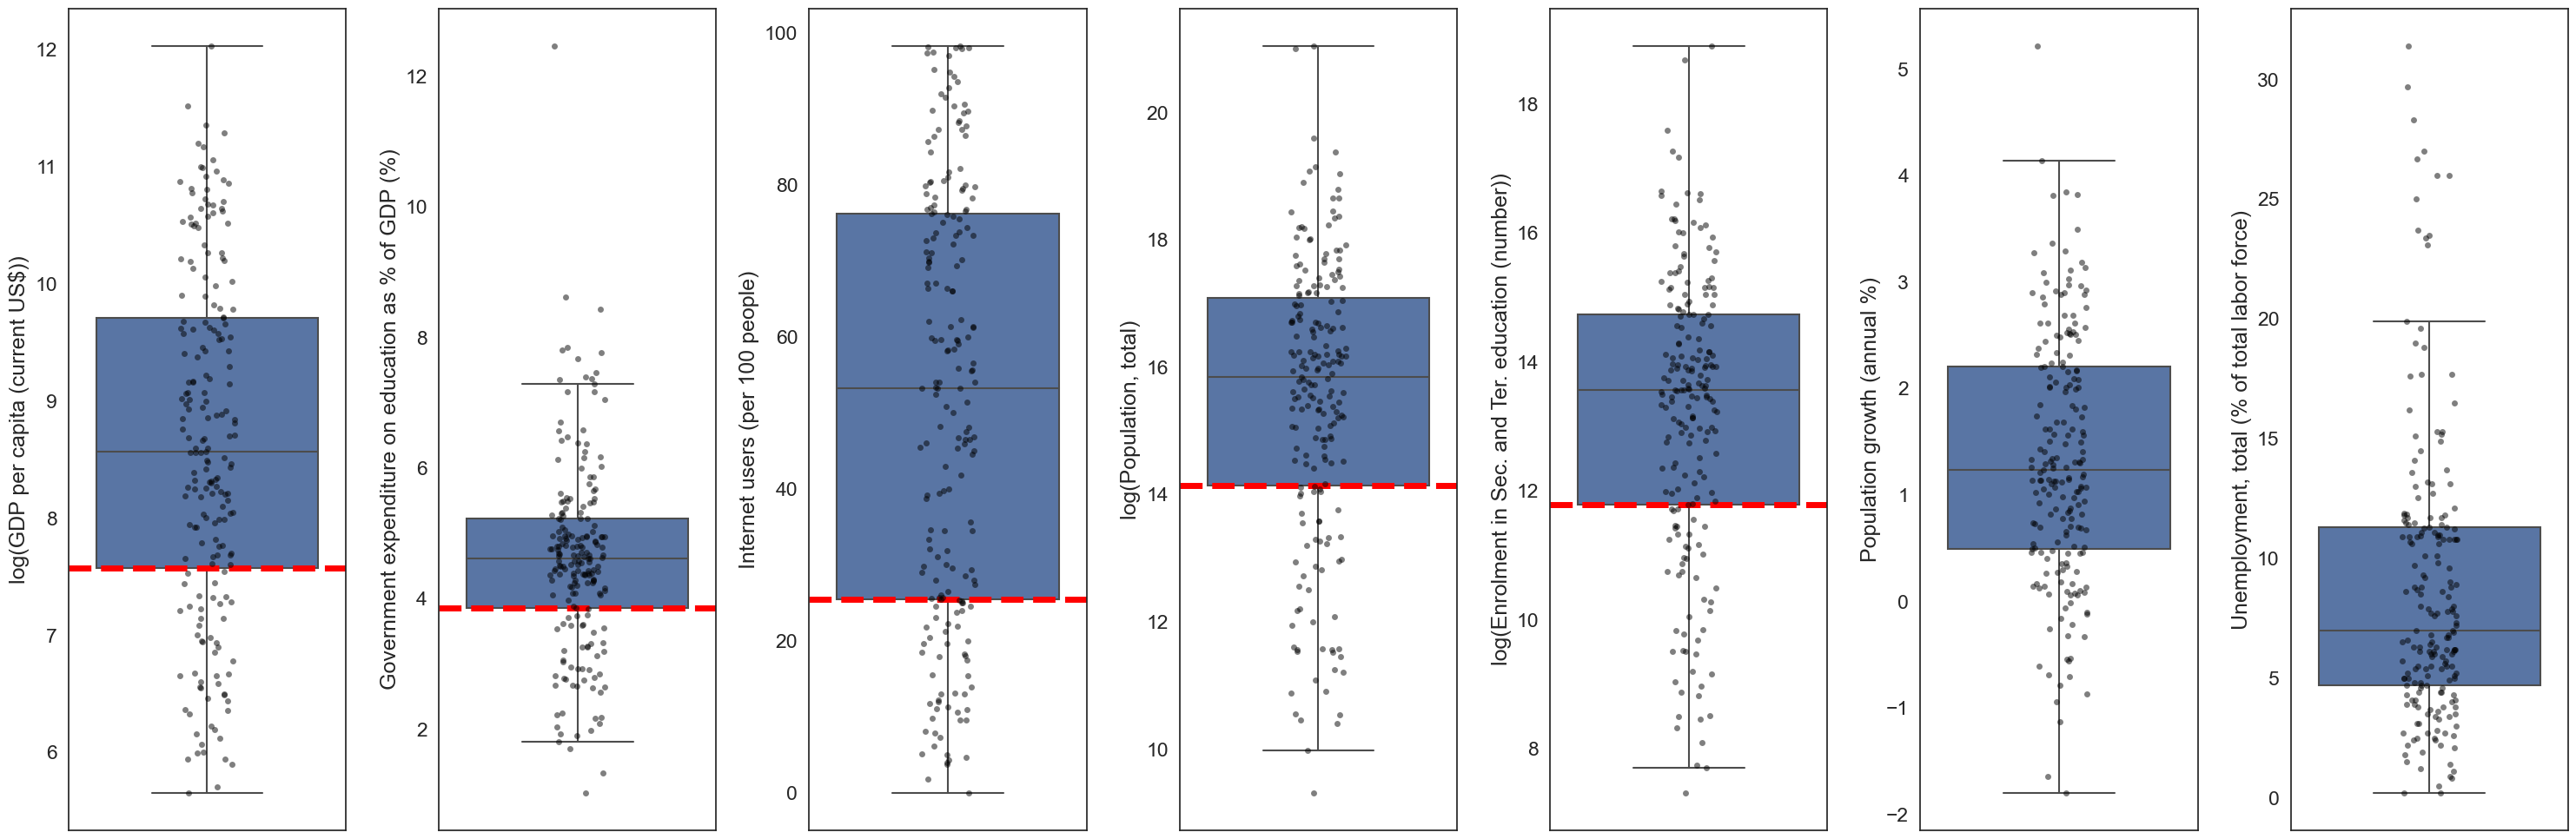

In [50]:
fig, axs = plt.subplots(ncols=7,nrows=1,figsize=(30,10))

sns.boxplot(ax=axs[0], y="log(GDP per capita (current US$))", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[0],y = "log(GDP per capita (current US$))",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[0].axhline(DataPivot_imp["log(GDP per capita (current US$))"].quantile(0.25), ls='--', color='red', lw=5)

sns.boxplot(ax=axs[1], y="Government expenditure on education as % of GDP (%)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[1],y = "Government expenditure on education as % of GDP (%)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[1].axhline(DataPivot_imp["Government expenditure on education as % of GDP (%)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[2], y="Internet users (per 100 people)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[2],y = "Internet users (per 100 people)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[2].axhline(DataPivot_imp["Internet users (per 100 people)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[3], y="log(Population, total)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[3],y = "log(Population, total)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[3].axhline(DataPivot_imp["log(Population, total)"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[4], y="log(Enrolment in Sec. and Ter. education (number))", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[4],y = "log(Enrolment in Sec. and Ter. education (number))",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)
axs[4].axhline(DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"].quantile(0.25), ls='--', color='red', lw=5)


sns.boxplot(ax=axs[5], y="Population growth (annual %)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[5],y = "Population growth (annual %)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)

sns.boxplot(ax=axs[6], y="Unemployment, total (% of total labor force)", data=DataPivot_imp,showfliers = False)
sns.stripplot(ax=axs[6],y = "Unemployment, total (% of total labor force)",
              alpha = 0.5,
              color='black',
              data = DataPivot_imp)

fig.tight_layout()

In [51]:
#L'objectif de cette étude est de déterminer les meilleurs pays susceptibles d'acceuillir l'entreprise de cours en ligne. 
#L'étape ci-dessous filtre et retire les pays dont les indicateurs pricipaux (population growth et unemployment étant minoritaire) sont inférieurs aux premiers quartiles de chaque indicateur

DataPivot_imp_F = DataPivot_imp[(DataPivot_imp["log(GDP per capita (current US$))"] >= DataPivot_imp["log(GDP per capita (current US$))"].quantile(0.25) ) & 
                                               (DataPivot_imp["Government expenditure on education as % of GDP (%)"] >= DataPivot_imp["Government expenditure on education as % of GDP (%)"].quantile(0.25)) &
                                               (DataPivot_imp["Internet users (per 100 people)"] >= DataPivot_imp["Internet users (per 100 people)"].quantile(0.25)) & 
                                               (DataPivot_imp["log(Population, total)"] >= DataPivot_imp["log(Population, total)"].quantile(0.25))& 
                                               (DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"] >= DataPivot_imp["log(Enrolment in Sec. and Ter. education (number))"].quantile(0.25))].copy()

In [52]:
DataPivot_imp_F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 2 to 193
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    77 non-null     float64
 1   Government expenditure on education as % of GDP (%)  77 non-null     float64
 2   Internet users (per 100 people)                      77 non-null     float64
 3   Population growth (annual %)                         77 non-null     float64
 4   log(Population, total)                               77 non-null     float64
 5   Unemployment, total (% of total labor force)         77 non-null     float64
 6   Country Name                                         77 non-null     object 
 7   log(Enrolment in Sec. and Ter. education (number))   77 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.4+ KB


# Indice de scoring

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
DataPivot_imp_scaled = pd.DataFrame(scaler.fit_transform(DataPivot_imp_F.drop(columns=["Country Name"])),index=DataPivot_imp_F.index, columns = DataPivot_imp_F.drop(columns=["Country Name"]).columns )
DataPivot_imp_scaled[["Country Name"]]=DataPivot_imp_F[["Country Name"]]
DataPivot_imp_scaled['Score'] = DataPivot_imp_scaled.drop(columns=["Country Name"]).sum(axis=1)/7
DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)

Indicator Name  log(GDP per capita (current US$))  \
188                                      0.911139   
49                                       0.891113   
187                                      0.814022   
169                                      0.882855   
61                                       0.789420   
65                                       0.825439   

Indicator Name  Government expenditure on education as % of GDP (%)  \
188                                                      0.318825     
49                                                       1.000000     
187                                                      0.382506     
169                                                      0.800238     
61                                                       0.342370     
65                                                       0.228894     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
188                                    0.705124                      0.354989   
49                                     0.995387                      0.375207   
187                                    0.964785                      0.367068   
169                                    0.919147                      0.406630   
61                                     0.836992                      0.314319   
65                                     0.893183                      0.426414   

Indicator Name  log(Population, total)  \
188                           0.778693   
49                            0.163636   
187                           0.535561   
169                           0.247065   
61                            0.538459   
65                            0.570749   

Indicator Name  Unemployment, total (% of total labor force)  \
188                                                 0.167939   
49                                                  0.217557   
187                                                 0.164122   
169                                                 0.248092   
61                                                  0.366412   
65                                                  0.137405   

Indicator Name  log(Enrolment in Sec. and Ter. education (number))  \
188                                                      0.831932    
49                                                       0.224429    
187                                                      0.585366    
169                                                      0.283888    
61                                                       0.575053    
65                                                       0.604646    

Indicator Name    Country Name     Score  
188              United States  0.581234  
49                     Denmark  0.552476  
187             United Kingdom  0.544776  
169                     Sweden  0.541131  
61                      France  0.537575  
65                     Germany  0.526676

In [54]:
DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)[['Country Name','Score']]

Indicator Name    Country Name     Score
188              United States  0.581234
49                     Denmark  0.552476
187             United Kingdom  0.544776
169                     Sweden  0.541131
61                      France  0.537575
65                     Germany  0.526676

In [55]:
Region = pd.read_csv('Data\EdStatsCountry.csv',sep=',')

# Récupération uniquement des variables d'intérets : 'Country Code' , 'Table Name' , 'Region'
print(Region.columns.values[[0,2,7]])
RegionF=Region[['Country Code', 'Table Name','Region']]

['Country Code' 'Table Name' 'Region']


In [56]:
# Jointure des données entre le jeu de données de base (PivotData_imp) et RegionF sur le nom des pays (noms différents entre les pays)
# Jointure à gauche afin d'attribuber une région à chaque pays présent dans nos données. 

DataPivot_imp_F = pd.merge(DataPivot_imp_F,RegionF, left_on ='Country Name',right_on ='Table Name' , how='left').set_axis(DataPivot_imp_F.index)

# retrait de Table name (doublon avec Country Name)
DataPivot_imp_F=DataPivot_imp_F.drop(columns=['Table Name'])

# Ajout du score construit a partir des données standardisées
DataPivot_imp_F['Score']=DataPivot_imp_scaled['Score']

In [57]:
# Aperçu du jeu de données

print(DataPivot_imp_F.info())

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 2 to 193
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    77 non-null     float64
 1   Government expenditure on education as % of GDP (%)  77 non-null     float64
 2   Internet users (per 100 people)                      77 non-null     float64
 3   Population growth (annual %)                         77 non-null     float64
 4   log(Population, total)                               77 non-null     float64
 5   Unemployment, total (% of total labor force)         77 non-null     float64
 6   Country Name                                         77 non-null     object 
 7   log(Enrolment in Sec. and Ter. education (number))   77 non-null     float64
 8   Country Code                                         77 non-null     object 

In [58]:
import plotly.express as px

fig = px.choropleth(DataPivot_imp_F, locations="Country Code",
                    color="Score", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale="Viridis")
fig.update_layout(
    title={
        'text': "<b>Carte des scores des différents pays d'intérêts</b>",
        'font': {'size': 20},
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1500, 
                  height=800)
fig.show()

In [59]:
Data_Selected_Countries = DataPivot_imp_F.sort_values('Score', ascending = False).head(6).reset_index(drop=True)
print(Data_Selected_Countries[["Country Name","Score"]])

     Country Name     Score
0   United States  0.581234
1         Denmark  0.552476
2  United Kingdom  0.544776
3          Sweden  0.541131
4          France  0.537575
5         Germany  0.526676


In [60]:
Data_Selected_Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   log(GDP per capita (current US$))                    6 non-null      float64
 1   Government expenditure on education as % of GDP (%)  6 non-null      float64
 2   Internet users (per 100 people)                      6 non-null      float64
 3   Population growth (annual %)                         6 non-null      float64
 4   log(Population, total)                               6 non-null      float64
 5   Unemployment, total (% of total labor force)         6 non-null      float64
 6   Country Name                                         6 non-null      object 
 7   log(Enrolment in Sec. and Ter. education (number))   6 non-null      float64
 8   Country Code                                         6 non-null      objec

In [61]:
list(Data_Selected_Countries["Country Name"])

['United States', 'Denmark', 'United Kingdom', 'Sweden', 'France', 'Germany']

In [62]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

Data_Selected_Countries2=DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)
#Selected_Country_list = list(Data_Selected_Countries2["Country Name"])
Selected_Country_list = ['United States', 'Denmark', 'United Kingdom', 'Sweden', 'Germany']
Data_Selected_Countries2.drop(columns=['Country Name','Score'], inplace=True)

Data_Selected_Countries2=Data_Selected_Countries2.reindex(columns=['log(GDP per capita (current US$))',
                                        'log(Enrolment in Sec. and Ter. education (number))',
                                        'Government expenditure on education as % of GDP (%)',
                                        'Unemployment, total (% of total labor force)',
                                        'Population growth (annual %)',
                                        'log(Population, total)',
                                        'Internet users (per 100 people)' 
                                          ])

theta = [*Data_Selected_Countries2.columns.to_list(),Data_Selected_Countries2.columns[0]]

fig = make_subplots(rows=1, cols=5,specs=[[{'type': 'polar'}] * 5] * 1,
                    subplot_titles=Selected_Country_list,print_grid = True,vertical_spacing = 0.1)



fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[0].values[0:8],Data_Selected_Countries2.iloc[0].values[0]]),
        fill='toself'),
    row=1, col=1
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))


fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[1].values[0:8],Data_Selected_Countries2.iloc[1].values[0]]),
        fill='toself'),
    row=1, col=2
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))

fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[2].values[0:8],Data_Selected_Countries2.iloc[2].values[0]]),
        fill='toself'),
    row=1, col=3
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))

fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[3].values[0:8],Data_Selected_Countries2.iloc[3].values[0]]),
        fill='toself'),
    row=1, col=4
)
fig.update_layout(polar = dict(angularaxis = dict(showticklabels = False)))

fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[5].values[0:8],Data_Selected_Countries2.iloc[5].values[0]]),
        fill='toself'),
    row=1, col=5
)

fig.update_polars(angularaxis = dict(showticklabels = False))


fig.update_layout(height=500, width=2000, font=dict(size=12))


fig.update(layout_showlegend=False)



fig.show()

This is the format of your plot grid:
[ (1,1) polar  ]  [ (1,2) polar2 ]  [ (1,3) polar3 ]  [ (1,4) polar4 ]  [ (1,5) polar5 ]



In [63]:

Data_Selected_Countries2=DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)
Selected_Country_list = ["France"]

Data_Selected_Countries2.drop(columns=['Country Name','Score'], inplace=True)

Data_Selected_Countries2=Data_Selected_Countries2.reindex(columns=['log(GDP per capita (current US$))',
                                                                   'log(Enrolment in Sec. and Ter. education (number))',
                                          'Government expenditure on education as % of GDP (%)',
                                          'Unemployment, total (% of total labor force)',
                                          'Population growth (annual %)',
                                          'log(Population, total)',
                                          'Internet users (per 100 people)' 
                                          ])

theta = [*Data_Selected_Countries2.columns.to_list(),Data_Selected_Countries2.columns[0]]

fig = make_subplots(rows=1, cols=1,specs=[[{'type': 'polar'}] * 1] * 1,
                    subplot_titles=Selected_Country_list,print_grid = True,vertical_spacing = 0.1)


fig.add_trace(
     go.Scatterpolar(
        theta=theta,
        r=list([*Data_Selected_Countries2.iloc[4].values[0:8],Data_Selected_Countries2.iloc[4].values[0]]),
        fill='toself'),
    row=1, col=1
)


fig.update_layout(height=500, width=2000,font=dict(size=15))

fig.update_annotations(yshift=20)

fig.update(layout_showlegend=False)

   

fig.show()

This is the format of your plot grid:
[ (1,1) polar ]



In [64]:
# Représentation synthétique : 1 radar chart

Data_Selected_Countries3=DataPivot_imp_scaled.sort_values('Score', ascending = False).head(6)

Data_Selected_Countries3= Data_Selected_Countries3.reindex(columns=['Country Name', 'Score',
                                                                    'log(GDP per capita (current US$))',
                                                                   'log(Enrolment in Sec. and Ter. education (number))',
                                          'Government expenditure on education as % of GDP (%)',
                                          'Unemployment, total (% of total labor force)',
                                          'Population growth (annual %)',
                                          'log(Population, total)',
                                          'Internet users (per 100 people)' 
                                          ])

Data_Selected_Countries_wide = pd.melt(Data_Selected_Countries3,id_vars='Country Name', value_vars=Data_Selected_Countries3.drop(columns=["Score"]).columns.to_list())

fig = px.line_polar(Data_Selected_Countries_wide, r="value", theta="Indicator Name", line_close=True, color = "Country Name")
fig.update_traces(fill='toself')

fig.update_layout(width=1600, 
                  height=800,font=dict(size=15),title_text="<b> Graphes en radar des différents indicateurs (standardisés) des 6 pays au plus haut score </b> ")

fig.show()

AttributeError: 'DataFrame' object has no attribute 'append'

In [65]:
# Jointure des données entre le jeu de données de base (PivotData_imp) et RegionF sur le nom des pays (noms différents entre les pays)
# Jointure à gauche afin d'attribuber une région à chaque pays présent dans nos données. 

DataPivot_imp = pd.merge(DataPivot_imp,RegionF, left_on ='Country Name',right_on ='Table Name' , how='left')


DataPivot_imp=DataPivot_imp.drop(columns=["Table Name","Country Code"])
DataPivot_imp


log(GDP per capita (current US$))  \
0                             6.331108   
1                             8.324817   
2                             8.273051   
3                            10.518366   
4                             8.104311   
..                                 ...   
194                          10.500972   
195                           7.987322   
196                           6.898043   
197                           7.146436   
198                           6.936417   

     Government expenditure on education as % of GDP (%)  \
0                                             3.317540     
1                                             3.539440     
2                                             4.543740     
3                                             3.253680     
4                                             4.279432     
..                                                 ...     
194                                           4.690134     
195                                           1.322320     
196                                           4.391766     
197                                           4.389015     
198                                           8.429330     

     Internet users (per 100 people)  Population growth (annual %)  \
0                          10.595726                      2.689163   
1                          66.363445                     -0.159880   
2                          42.945527                      1.825463   
3                          97.930637                     -0.944017   
4                          13.000000                      3.367572   
..                               ...                           ...   
194                        59.608316                     -0.603319   
195                        61.178385                      2.884693   
196                        24.579208                      2.451502   
197                        25.506579                      3.002816   
198                        23.119989                      2.336070   

     log(Population, total)  Unemployment, total (% of total labor force)  \
0                 17.360982                                      8.600000   
1                 14.871946                                     15.200000   
2                 17.519428                                     11.500000   
3                 11.255203                                     11.227232   
4                 17.176353                                      6.100000   
..                      ...                                           ...   
194               11.542008                                      8.000000   
195               15.330982                                     27.000000   
196               17.132754                                     16.200001   
197               16.624394                                      7.600000   
198               16.597453                                      5.200000   

              Country Name  \
0              Afghanistan   
1                  Albania   
2                  Algeria   
3                  Andorra   
4                   Angola   
..                     ...   
194  Virgin Islands (U.S.)   
195     West Bank and Gaza   
196            Yemen, Rep.   
197                 Zambia   
198               Zimbabwe   

     log(Enrolment in Sec. and Ter. education (number))  \
0                                            14.901271    
1                                            13.072345    
2                                            15.382847    
3                                             8.496174    
4                                            14.561280    
..                                                 ...    
194                                           9.527963    
195                                          13.756219    
196                                          14.541228    
197                                          13.598149    
198

In [66]:
# On retourne au jeu de donnée non filtré pour lui ajouter une colonne contenant les scores des pays de l'étude
DataPivot_imp=pd.concat([DataPivot_imp,DataPivot_imp_F["Score"]], axis=1)

# Création d'une colonne Color pour la représentation graphique : Les points rouges seront les pays filtrés utilisés pour le scoring
DataPivot_imp['Color']=DataPivot_imp['Score'].isna()
DataPivot_imp

log(GDP per capita (current US$))  \
0                             6.331108   
1                             8.324817   
2                             8.273051   
3                            10.518366   
4                             8.104311   
..                                 ...   
194                          10.500972   
195                           7.987322   
196                           6.898043   
197                           7.146436   
198                           6.936417   

     Government expenditure on education as % of GDP (%)  \
0                                             3.317540     
1                                             3.539440     
2                                             4.543740     
3                                             3.253680     
4                                             4.279432     
..                                                 ...     
194                                           4.690134     
195                                           1.322320     
196                                           4.391766     
197                                           4.389015     
198                                           8.429330     

     Internet users (per 100 people)  Population growth (annual %)  \
0                          10.595726                      2.689163   
1                          66.363445                     -0.159880   
2                          42.945527                      1.825463   
3                          97.930637                     -0.944017   
4                          13.000000                      3.367572   
..                               ...                           ...   
194                        59.608316                     -0.603319   
195                        61.178385                      2.884693   
196                        24.579208                      2.451502   
197                        25.506579                      3.002816   
198                        23.119989                      2.336070   

     log(Population, total)  Unemployment, total (% of total labor force)  \
0                 17.360982                                      8.600000   
1                 14.871946                                     15.200000   
2                 17.519428                                     11.500000   
3                 11.255203                                     11.227232   
4                 17.176353                                      6.100000   
..                      ...                                           ...   
194               11.542008                                      8.000000   
195               15.330982                                     27.000000   
196               17.132754                                     16.200001   
197               16.624394                                      7.600000   
198               16.597453                                      5.200000   

              Country Name  \
0              Afghanistan   
1                  Albania   
2                  Algeria   
3                  Andorra   
4                   Angola   
..                     ...   
194  Virgin Islands (U.S.)   
195     West Bank and Gaza   
196            Yemen, Rep.   
197                 Zambia   
198               Zimbabwe   

     log(Enrolment in Sec. and Ter. education (number))  \
0                                            14.901271    
1                                            13.072345    
2                                            15.382847    
3                                             8.496174    
4                                            14.561280    
..                                                 ...    
194                                           9.527963    
195                                          13.756219    
196                                          14.541228    
197                                          13.598149    
198

In [67]:
# Descriptions statistiques des indicateurs par régions : 
DataPivot_imp.groupby('Region').describe()

log(GDP per capita (current US$))             \
                                                       count       mean   
Region                                                                    
East Asia & Pacific                                     30.0   8.872174   
Europe & Central Asia                                   52.0   9.621927   
Latin America & Caribbean                               37.0   9.012164   
Middle East & North Africa                              20.0   8.944662   
North America                                            3.0  10.990096   
South Asia                                               8.0   7.532275   
Sub-Saharan Africa                                      45.0   7.051257   

                                                                       \
                                 std        min        25%        50%   
Region                                                                  
East Asia & Pacific         1.291981   7.086333   7.966562   8.265337   
Europe & Central Asia       1.227542   6.679403   8.721570   9.748081   
Latin America & Caribbean   0.834045   6.606103   8.492609   8.975469   
Middle East & North Africa  1.193546   6.898043   8.112458   8.497989   
North America               0.355832  10.649178  10.805559  10.961940   
South Asia                  0.928309   6.331108   7.058717   7.359461   
Sub-Saharan Africa          1.025415   5.655038   6.360372   6.779005   

                                                  \
                                  75%        max   
Region                                             
East Asia & Pacific         10.217850  11.200773   
Europe & Central Asia       10.654881  12.032588   
Latin America & Caribbean    9.579292  10.807749   
Middle East & North Africa  10.051962  10.990775   
North America               11.160554  11.359169   
South Asia                   8.008919   9.222077   
Sub-Saharan Africa           7.685094   9.620841   

                           Government expenditure on education as % of GDP (%)  \
                                                                         count   
Region                                                                           
East Asia & Pacific                                                      30.0    
Europe & Central Asia                                                    52.0    
Latin America & Caribbean                                                37.0    
Middle East & North Africa                                               20.0    
North America                                                             3.0    
South Asia                                                                8.0    
Sub-Saharan Africa                                                       45.0    

                                      ...  \
                                mean  ...   
Region                                ...   
East Asia & Pacific         4.675858  ...   
Europe & Central Asia       4.878593  ...   
Latin America & Caribbean   4.910190  ...   
Middle East & North Africa  4.421859  ...   
North America               4.008851  ...   
South Asia                  3.776182  ...   
Sub-Saharan Africa          4.305162  ...   

                           log(Enrolment in Sec. and Ter. education (number))  \
                                                                          75%   
Region                                                                          
East Asia & Pacific                                                 15.157169   
Europe & Central Asia                                               14.409444   
Latin America & Caribbean                                           14.161489   
Middle East & North Africa                                          14.964207   
North America                                                       16.431945   
South Asia                                                          16.494972   
Sub-Saharan Africa     

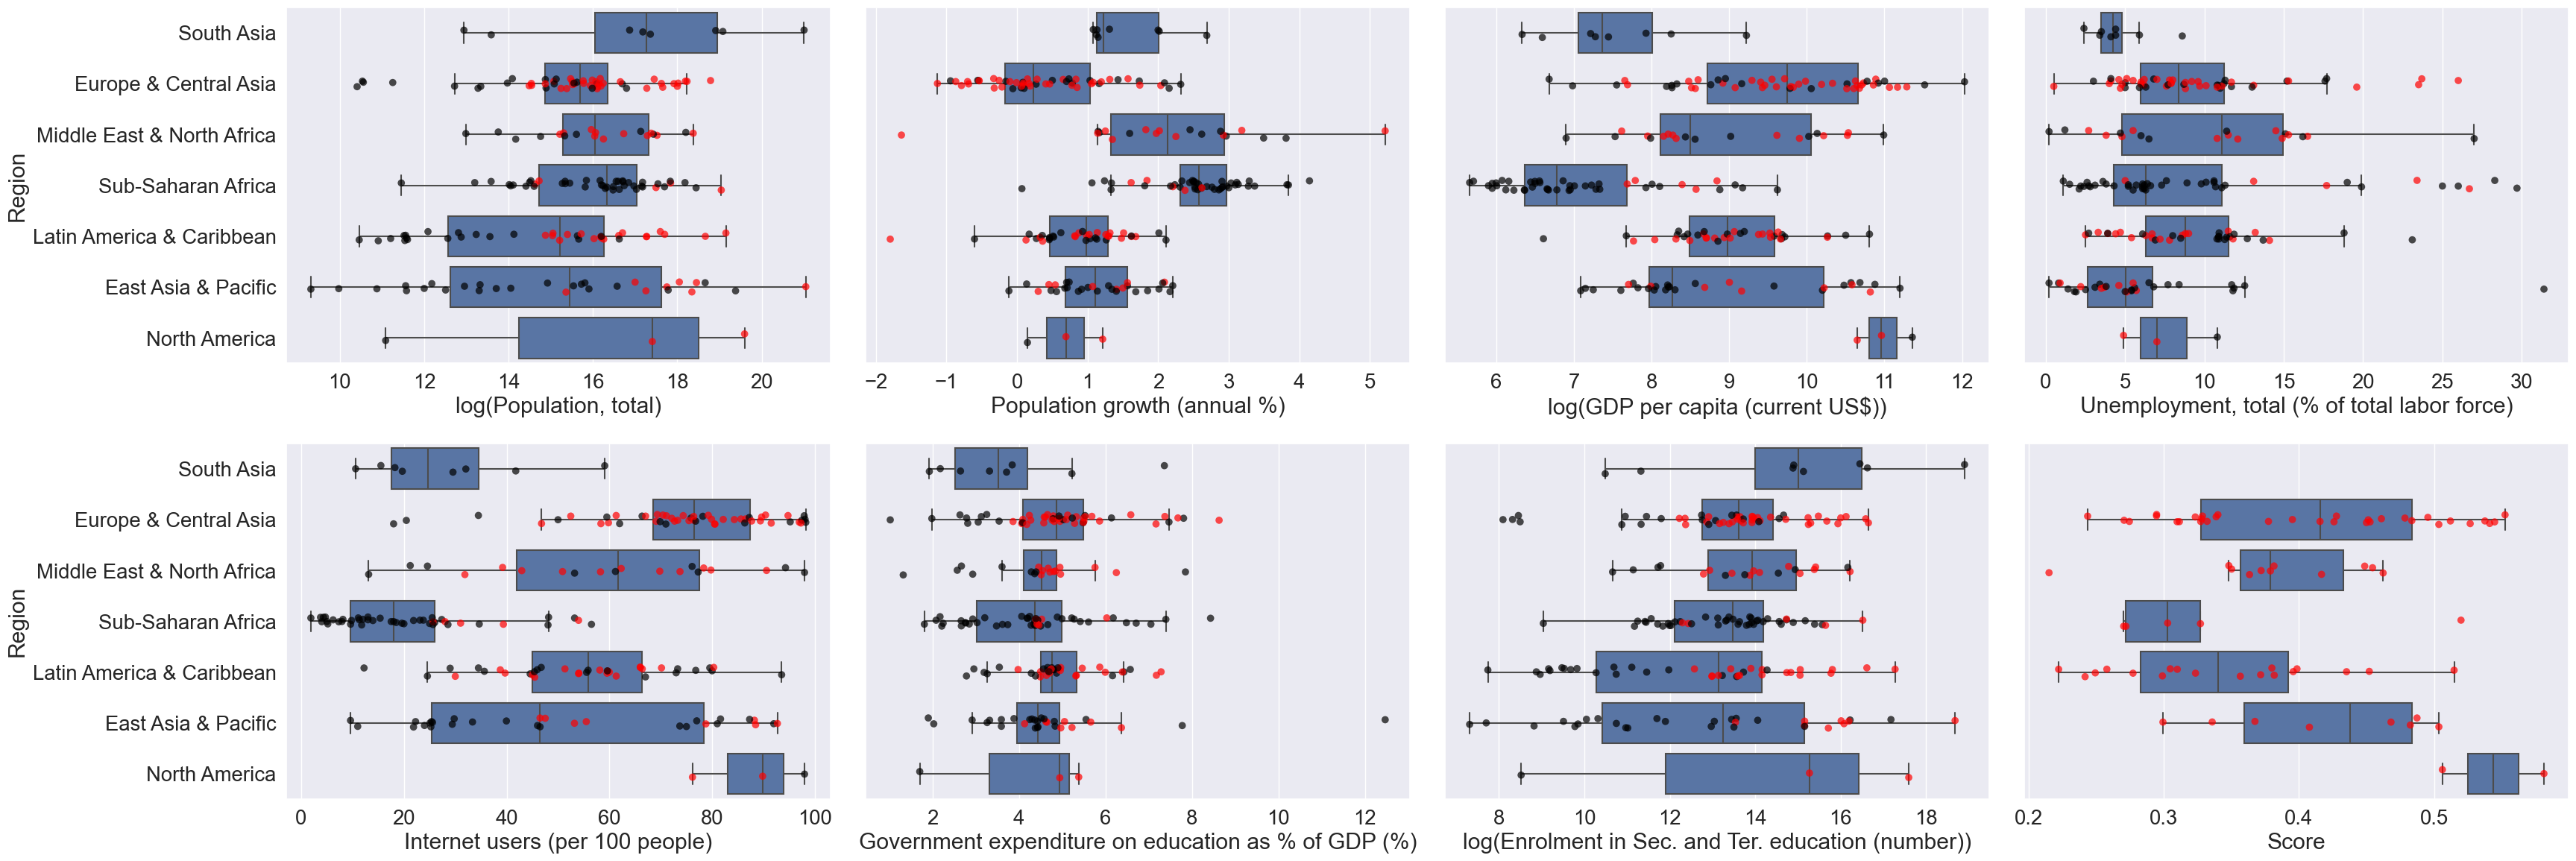

In [68]:
sns.set(font_scale=1.8)

fig, axs = plt.subplots(ncols=4,nrows=2,figsize=(35,12))

sns.boxplot(ax=axs[0,2], y="Region", x="log(GDP per capita (current US$))", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,2],x = "log(GDP per capita (current US$))",
              y ="Region",
              alpha = 0.7,
              hue='Color',
              palette=["red", "black"],
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[1,1], y="Region", x="Government expenditure on education as % of GDP (%)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,1],x = "Government expenditure on education as % of GDP (%)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[1,0], y="Region", x="Internet users (per 100 people)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,0],x = "Internet users (per 100 people)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[0,1], y="Region", x="Population growth (annual %)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,1],x = "Population growth (annual %)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[0,0], y="Region", x="log(Population, total)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,0],x ="log(Population, total)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[0,3], y="Region", x="Unemployment, total (% of total labor force)", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[0,3],x = "Unemployment, total (% of total labor force)",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)



sns.boxplot(ax=axs[1,2], y="Region", x="log(Enrolment in Sec. and Ter. education (number))", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,2],x = "log(Enrolment in Sec. and Ter. education (number))",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

sns.boxplot(ax=axs[1,3], y="Region", x="Score", data=DataPivot_imp,showfliers = False,color="b")
sns.stripplot(ax=axs[1,3],x = "Score",
              y ="Region",
              hue='Color',
              palette=["red", "black"],
              alpha = 0.7,
              data = DataPivot_imp,
              size=7)

axs[0,0].get_legend().remove()

axs[0,1].set(ylabel=None,yticklabels=[])
axs[0,1].get_legend().remove()

axs[0,2].set(ylabel=None,yticklabels=[])
axs[0,2].get_legend().remove()

axs[0,3].set(ylabel=None,yticklabels=[])
axs[0,3].get_legend().remove()

axs[1,0].get_legend().remove()

axs[1,1].set(ylabel=None,yticklabels=[])
axs[1,1].get_legend().remove()

axs[1,2].set(ylabel=None,yticklabels=[])
axs[1,2].get_legend().remove()

axs[1,3].set(ylabel=None,yticklabels=[])
axs[1,3].get_legend().remove()


fig.tight_layout()


plt.show()

In [69]:
DataPivot_imp_F['mean_score'] = DataPivot_imp_F.groupby('Region')['Score'].transform('mean')

In [70]:

fig = px.choropleth(DataPivot_imp_F, locations="Country Code",
                    color="mean_score", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale="Viridis",range_color=[0.24,0.60])
fig.update_layout(
    title={
        'text': "<b>Carte des scores moyens par région</b>",
        'font': {'size': 20},
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=700)
fig.show()

Text(0.5, 0, 'Score moyen')

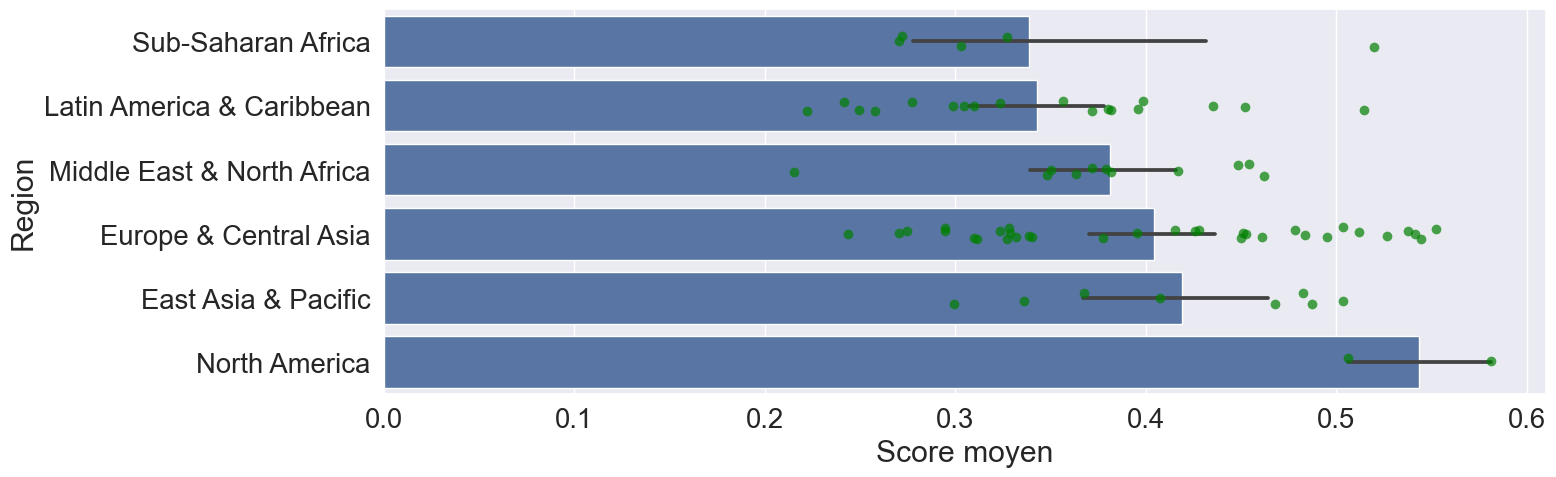

In [81]:
ax=sns.barplot(y="Region", x="Score", data=DataPivot_imp_F.sort_values('mean_score'),color="b")

sns.stripplot(x = "Score",
              y ="Region",
              alpha = 0.7,
              data = DataPivot_imp_F.sort_values('mean_score'),
              size=7,
              color='green')
ax.set_xlabel("Score moyen")


In [72]:
list(DataPivot_imp["Country Name"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-B

In [73]:
list(DataPivot_imp["Region"].unique())

['South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'East Asia & Pacific',
 'North America',
 nan]

In [80]:
ColumnsToKeep=["Country Name",
               "Enrolment in secondary education, both sexes (number)",
               "Enrolment in tertiary education, all programmes, both sexes (number)",
               "GDP per capita (current US$)",
               "Government expenditure on education as % of GDP (%)",
               "Internet users (per 100 people)",
               "Population growth (annual %)",
               "Population, total",
               "Unemployment, total (% of total labor force)",
               ]



#Reprise du jeu de données original avec toutes les informations  :  Selection des pays et des indicateurs d'intérêts
dataTempoRegion=edstatsdata[(edstatsdata['Country Name'].isin(list(DataPivot_imp["Country Name"].unique()))) & (edstatsdata['Indicator Name'].isin(ColumnsToKeep))] 

#Réorganisation du jeu de donnée (format Wide, ou tidy) et suppression des années des projections de Witt. 
yearToKeep=dataTempoRegion.columns.to_list()[4:51]
dataTempoRegion=pd.melt(dataTempoRegion, id_vars=["Indicator Name","Country Name"], value_vars=[*yearToKeep],var_name='Year')
dataTempoRegion

Indicator Name Country Name  Year  \
0      Enrolment in secondary education, both sexes (...  Afghanistan  1970   
1      Enrolment in tertiary education, all programme...  Afghanistan  1970   
2                           GDP per capita (current US$)  Afghanistan  1970   
3      Government expenditure on education as % of GD...  Afghanistan  1970   
4                        Internet users (per 100 people)  Afghanistan  1970   
...                                                  ...          ...   ...   
74819  Government expenditure on education as % of GD...     Zimbabwe  2016   
74820                    Internet users (per 100 people)     Zimbabwe  2016   
74821                       Population growth (annual %)     Zimbabwe  2016   
74822                                  Population, total     Zimbabwe  2016   
74823       Unemployment, total (% of total labor force)     Zimbabwe  2016   

              value  
0      1.161740e+05  
1      7.732000e+03  
2      1.571874e+02  
3               NaN  
4               NaN  
...             ...  
74819           NaN  
74820  2.311999e+01  
74821  2.336070e+00  
74822  1.615036e+07  
74823  5.200000e+00  

[74824 rows x 4 columns]

In [82]:
# Afin de calculer la somme du recrutement en secondaire et tertiaire, il faut repasser en format 'Long'
dataTempoRegion=dataTempoRegion.pivot_table(index=['Country Name','Year'], columns='Indicator Name', values='value').reset_index()
dataTempoRegion["log(Enrolment in Sec. and Ter. education (number))"] = np.log(dataTempoRegion["Enrolment in secondary education, both sexes (number)"] + dataTempoRegion["Enrolment in tertiary education, all programmes, both sexes (number)"])
dataTempoRegion["log(Population, total)"] = np.log(dataTempoRegion["Population, total"])
dataTempoRegion["log(GDP per capita (current US$))"] = np.log(dataTempoRegion["GDP per capita (current US$)"])
dataTempoRegion=dataTempoRegion.drop(columns=["Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Population, total","GDP per capita (current US$)"])
dataTempoRegion

Indicator Name Country Name  Year  \
0               Afghanistan  1970   
1               Afghanistan  1971   
2               Afghanistan  1972   
3               Afghanistan  1973   
4               Afghanistan  1974   
...                     ...   ...   
9277               Zimbabwe  2012   
9278               Zimbabwe  2013   
9279               Zimbabwe  2014   
9280               Zimbabwe  2015   
9281               Zimbabwe  2016   

Indicator Name  Government expenditure on education as % of GDP (%)  \
0                                                             NaN     
1                                                         1.16036     
2                                                         1.11718     
3                                                         1.42788     
4                                                             NaN     
...                                                           ...     
9277                                                      8.38322     
9278                                                      8.48536     
9279                                                      8.42933     
9280                                                          NaN     
9281                                                          NaN     

Indicator Name  Internet users (per 100 people)  Population growth (annual %)  \
0                                           NaN                      2.472266   
1                                           NaN                      2.587996   
2                                           NaN                      2.628657   
3                                           NaN                      2.576017   
4                                           NaN                      2.412657   
...                                         ...                           ...   
9277                                  12.000000                      2.228306   
9278                                  15.500000                      2.309366   
9279                                  16.364740                      2.344799   
9280                                  22.742818                      2.345643   
9281                                  23.119989                      2.336070   

Indicator Name  Unemployment, total (% of total labor force)  \
0                                                        NaN   
1                                                        NaN   
2                                                        NaN   
3                                                        NaN   
4                                                        NaN   
...                                                      ...   
9277                                                     5.3   
9278                                                     5.2   
9279                                                     5.1   
9280                                                     5.1   
9281                                                     5.2   

Indicator Name  log(Enrolment in Sec. and Ter. education (number))  \
0                                                       11.727278    
1                                                       11.873937    
2                                                       12.000751    
3                                                       12.082961    
4                                                       12.121348    
...                                                           ...    
9277                                                    13.845793    
9278                                                    13.865801    
9279                                                          NaN    
9280                                                          NaN    
9281                                                          NaN    

Indicator Name  log(Population, total)  log(GDP per capita (current US$))  
0                            16.224806     

In [83]:
dataTempoRegionTidy=pd.melt(dataTempoRegion, id_vars=["Year","Country Name"], value_vars=[*dataTempoRegion.columns.to_list()[2:9]])

#transformation de l'année str en int (il ne sera pas nécessaire de le transformer en date time)
dataTempoRegionTidy['Year_Int'] = dataTempoRegionTidy['Year'].astype(int)
dataTempoRegionTidy


Year Country Name                                     Indicator Name  \
0      1970  Afghanistan  Government expenditure on education as % of GD...   
1      1971  Afghanistan  Government expenditure on education as % of GD...   
2      1972  Afghanistan  Government expenditure on education as % of GD...   
3      1973  Afghanistan  Government expenditure on education as % of GD...   
4      1974  Afghanistan  Government expenditure on education as % of GD...   
...     ...          ...                                                ...   
64969  2012     Zimbabwe                  log(GDP per capita (current US$))   
64970  2013     Zimbabwe                  log(GDP per capita (current US$))   
64971  2014     Zimbabwe                  log(GDP per capita (current US$))   
64972  2015     Zimbabwe                  log(GDP per capita (current US$))   
64973  2016     Zimbabwe                  log(GDP per capita (current US$))   

          value  Year_Int  
0           NaN      1970  
1      1.160360      1971  
2      1.117180      1972  
3      1.427880      1973  
4           NaN      1974  
...         ...       ...  
64969  6.875401      2012  
64970  6.933801      2013  
64971  6.938386      2014  
64972  6.940625      2015  
64973  6.936417      2016  

[64974 rows x 5 columns]

In [84]:
dataTempoRegionTidy = pd.merge(dataTempoRegionTidy,DataPivot_imp[['Country Name','Region']], on ='Country Name',how='left')
dataTempoRegionTidy

Year Country Name                                     Indicator Name  \
0      1970  Afghanistan  Government expenditure on education as % of GD...   
1      1971  Afghanistan  Government expenditure on education as % of GD...   
2      1972  Afghanistan  Government expenditure on education as % of GD...   
3      1973  Afghanistan  Government expenditure on education as % of GD...   
4      1974  Afghanistan  Government expenditure on education as % of GD...   
...     ...          ...                                                ...   
64969  2012     Zimbabwe                  log(GDP per capita (current US$))   
64970  2013     Zimbabwe                  log(GDP per capita (current US$))   
64971  2014     Zimbabwe                  log(GDP per capita (current US$))   
64972  2015     Zimbabwe                  log(GDP per capita (current US$))   
64973  2016     Zimbabwe                  log(GDP per capita (current US$))   

          value  Year_Int              Region  
0           NaN      1970          South Asia  
1      1.160360      1971          South Asia  
2      1.117180      1972          South Asia  
3      1.427880      1973          South Asia  
4           NaN      1974          South Asia  
...         ...       ...                 ...  
64969  6.875401      2012  Sub-Saharan Africa  
64970  6.933801      2013  Sub-Saharan Africa  
64971  6.938386      2014  Sub-Saharan Africa  
64972  6.940625      2015  Sub-Saharan Africa  
64973  6.936417      2016  Sub-Saharan Africa  

[64974 rows x 6 columns]

C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anacond

<Figure size 2000x2000 with 0 Axes>

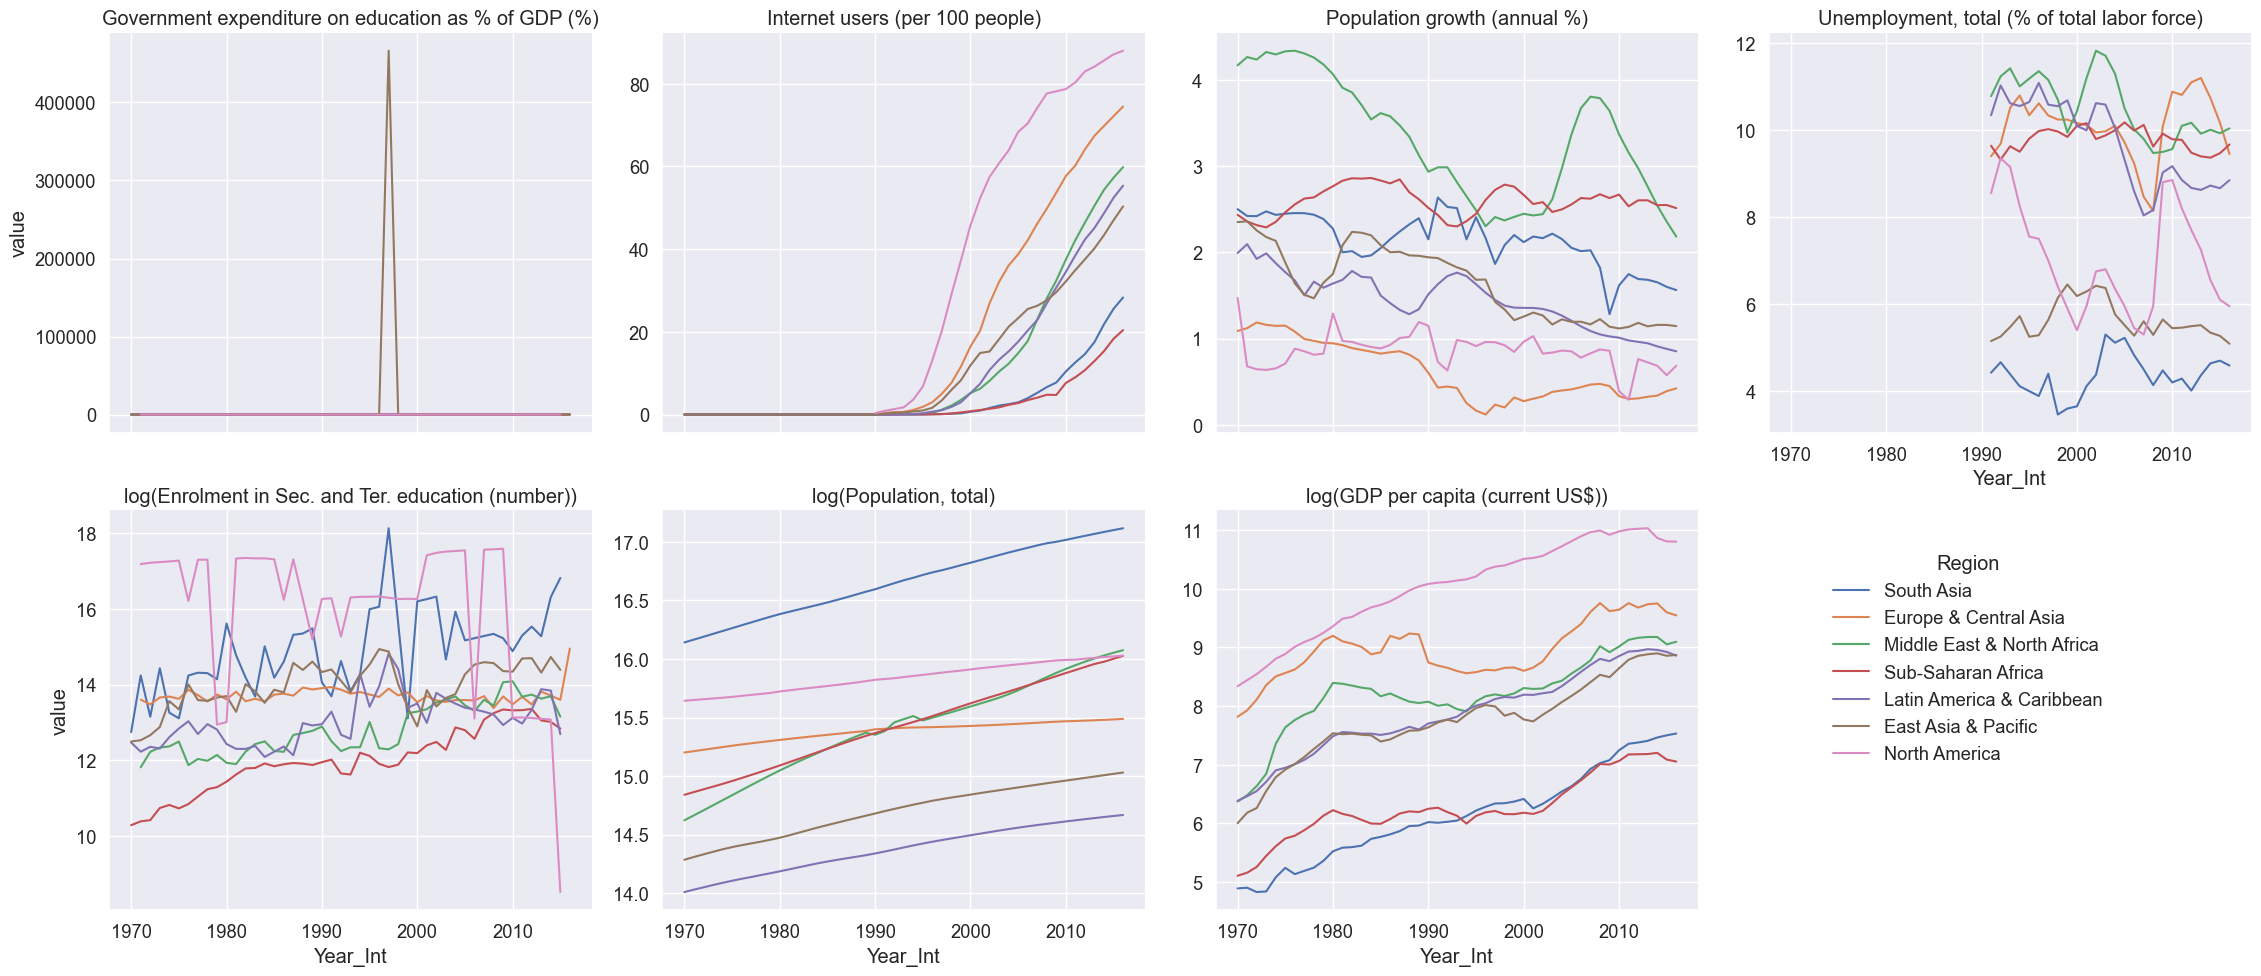

In [87]:
print("Valeur maximale des indicateurs: ")
print("")
print(dataTempoRegionTidy.groupby(['Indicator Name'])['value'].max())
print("")
print("_"*30)
print("")
print("ID de la valeur maximale: ")
print("")
print(dataTempoRegionTidy.groupby(['Indicator Name'])['value'].idxmax())

Valeur maximale des indicateurs: 

Indicator Name
Government expenditure on education as % of GDP (%)    3.730834e+06
Internet users (per 100 people)                        9.832361e+01
Population growth (annual %)                           1.769530e+01
Unemployment, total (% of total labor force)           3.930000e+01
log(Enrolment in Sec. and Ter. education (number))     1.890094e+01
log(GDP per capita (current US$))                      1.217039e+01
log(Population, total)                                 2.104438e+01
Name: value, dtype: float64

______________________________

ID de la valeur maximale: 

Indicator Name
Government expenditure on education as % of GDP (%)     8577
Internet users (per 100 people)                        10267
Population growth (annual %)                           27258
Unemployment, total (% of total labor force)           32448
log(Enrolment in Sec. and Ter. education (number))     40855
log(GDP per capita (current US$))                      61198
log(

In [88]:
# Remplacement de la valeur aberrante par NaN 

print(dataTempoRegionTidy.at[8577,'value'])
dataTempoRegionTidy.at[8577,'value'] = np.nan
print(dataTempoRegionTidy.at[8577,'value'])

3730833.5
nan


In [89]:
# Création d'une colonne 'moving' contenant les moyennes glissantes (avec un pas de 5 ans) afin de lisser les séries temporelles et dégager une tendance. 
dataTempoRegionTidy['Value (moving average ~5 years)'] = dataTempoRegionTidy.groupby(['Indicator Name','Country Name'])['value'].transform(lambda x: x.rolling(5, 1).mean())

C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anacond

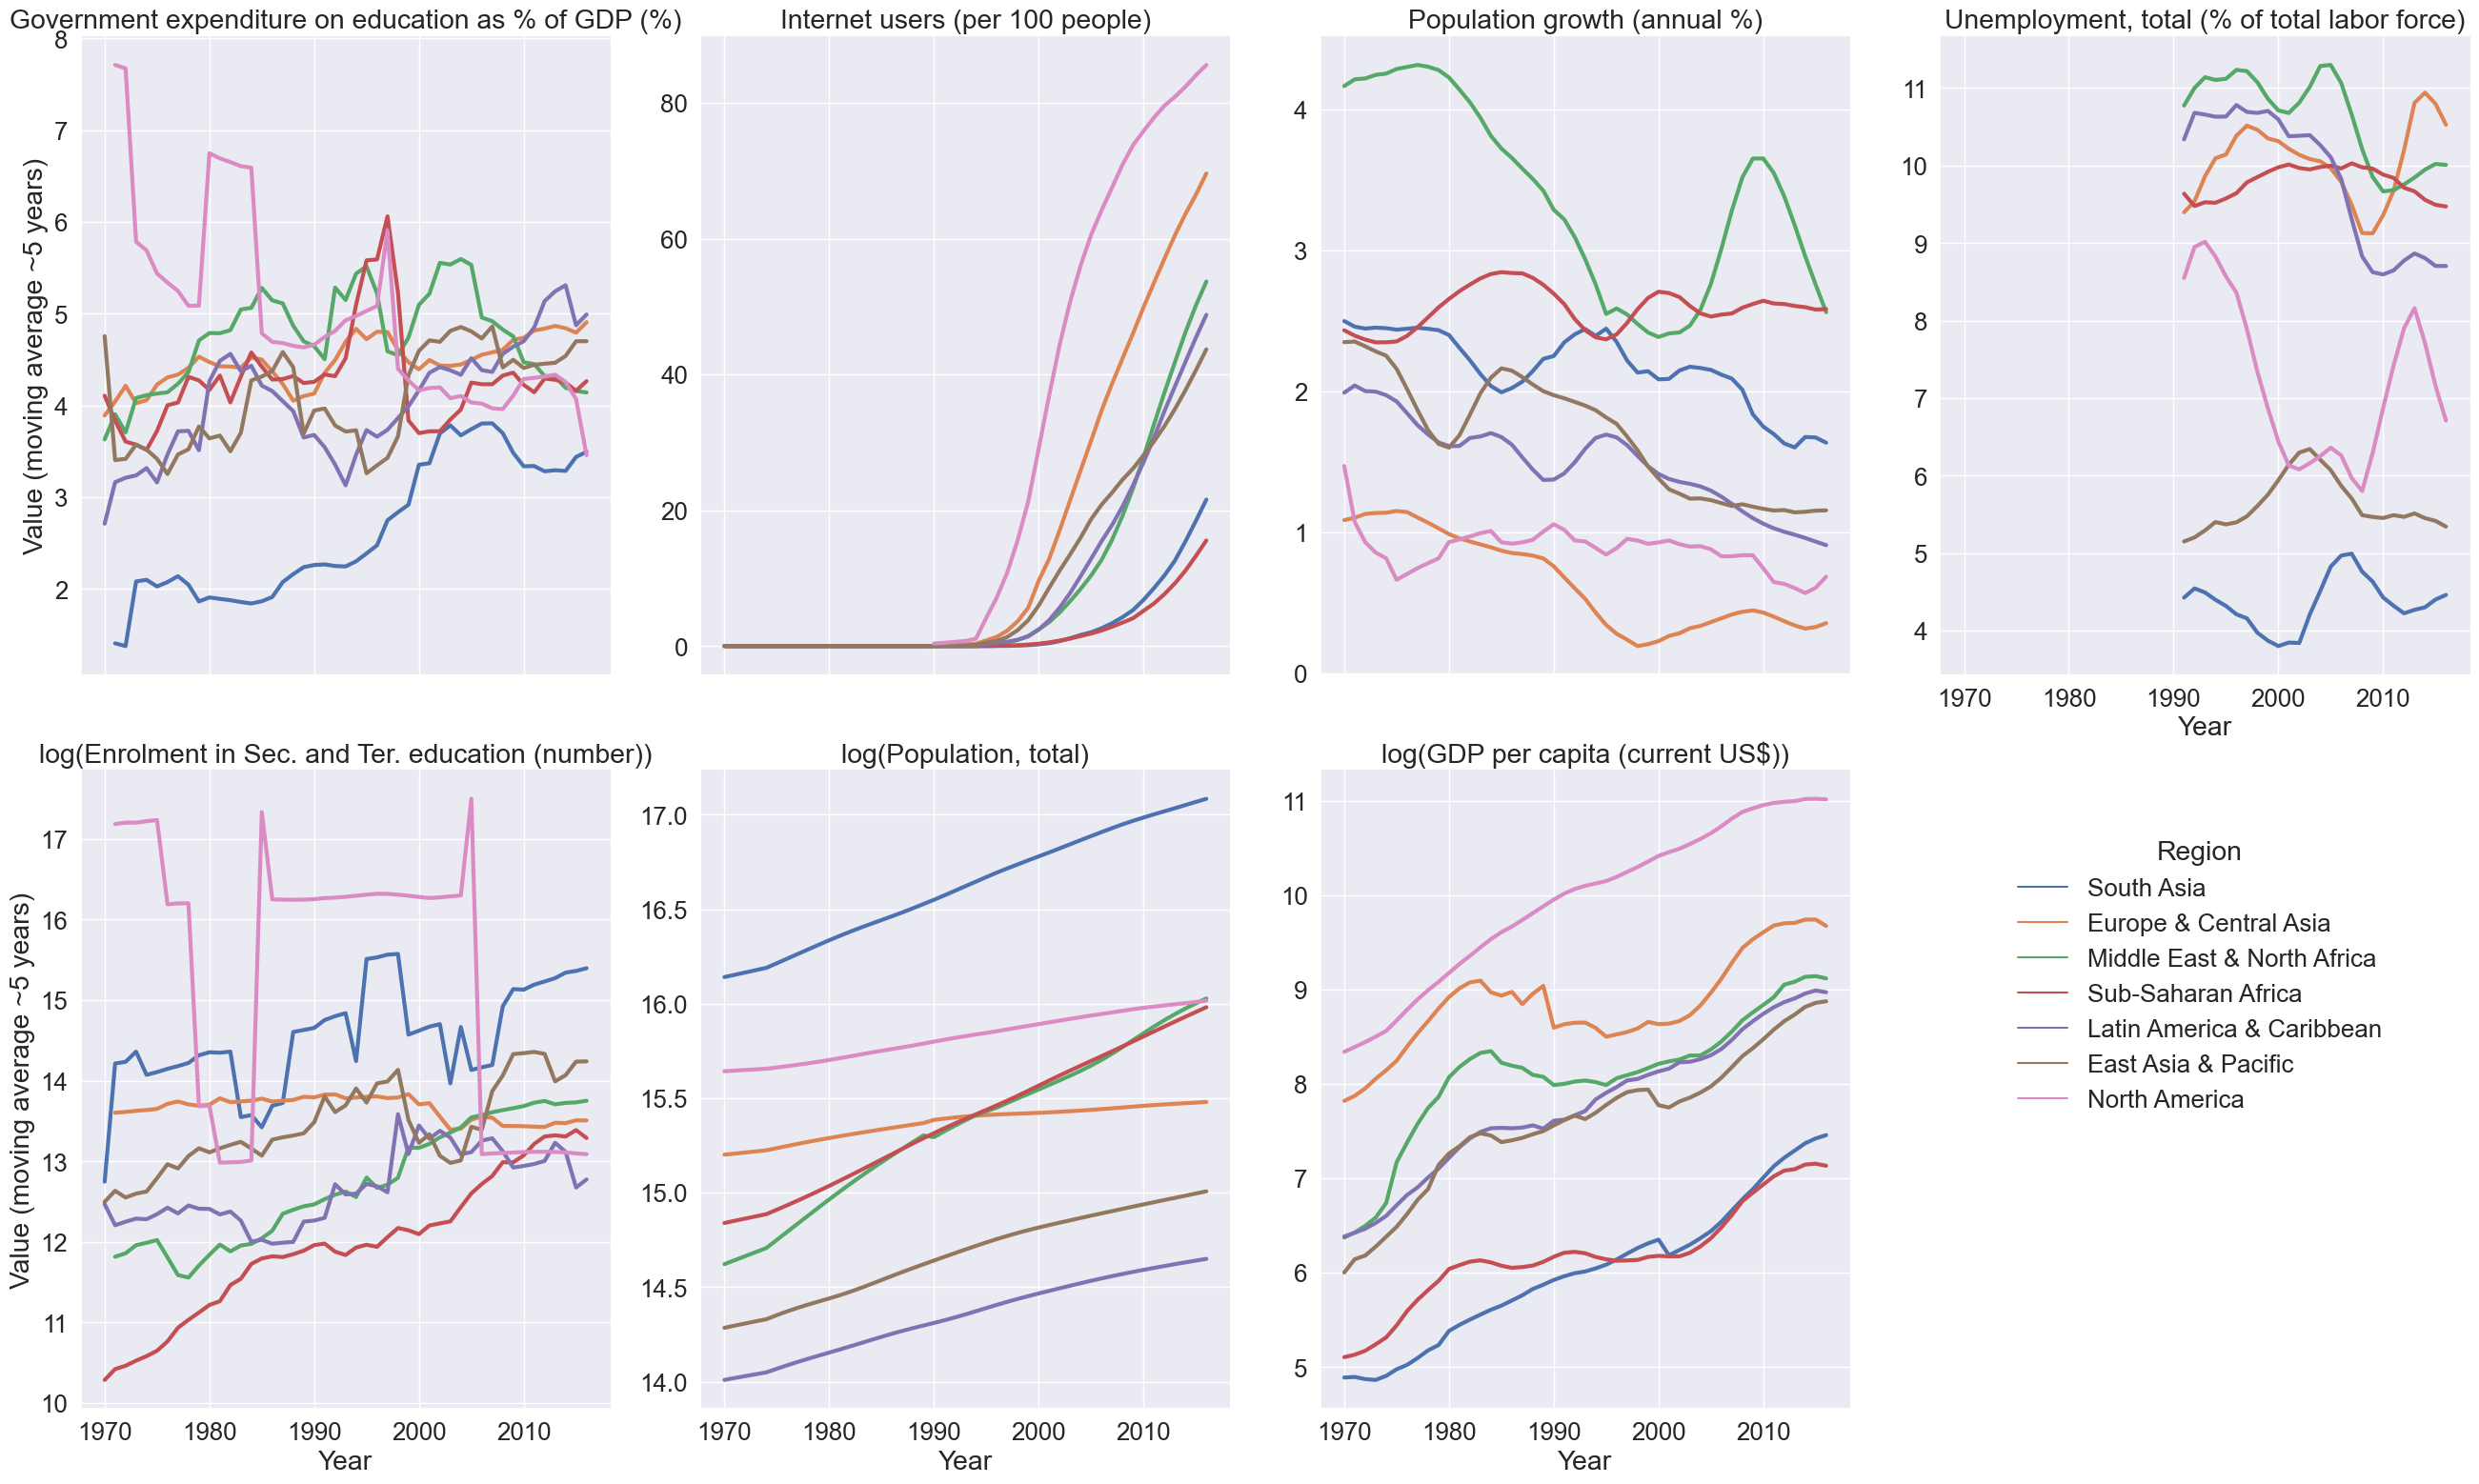

In [90]:

# Représentation synthétique : 1 radar chart
sns.set(font_scale=1.7)


lm = sns.relplot(x='Year_Int', y='Value (moving average ~5 years)', col='Indicator Name', hue='Region', data=dataTempoRegionTidy, kind="line", facet_kws={'sharey': False, 'sharex': True},col_wrap=4,ci=None,lw=3,height=8, aspect=0.7)
fig = lm.fig
fig.axes[0].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[0])
fig.axes[1].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[1])
fig.axes[2].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[2])
fig.axes[3].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[3])
fig.axes[3].set_xlabel('Year')
fig.axes[4].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[4])
fig.axes[4].set_xlabel('Year')
fig.axes[5].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[5])
fig.axes[5].set_xlabel('Year')
fig.axes[6].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[6])
fig.axes[6].set_xlabel('Year')

sns.move_legend(lm, "upper left", bbox_to_anchor=(.80, .45))



plt.tight_layout()
plt.show()

In [91]:
# Représentation graphique des séries temporelles par pays et par indicateur
dataTempoCountryTidy=dataTempoRegionTidy[dataTempoRegionTidy['Country Name'].isin(list(Data_Selected_Countries["Country Name"]))]



C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\flows\anacond

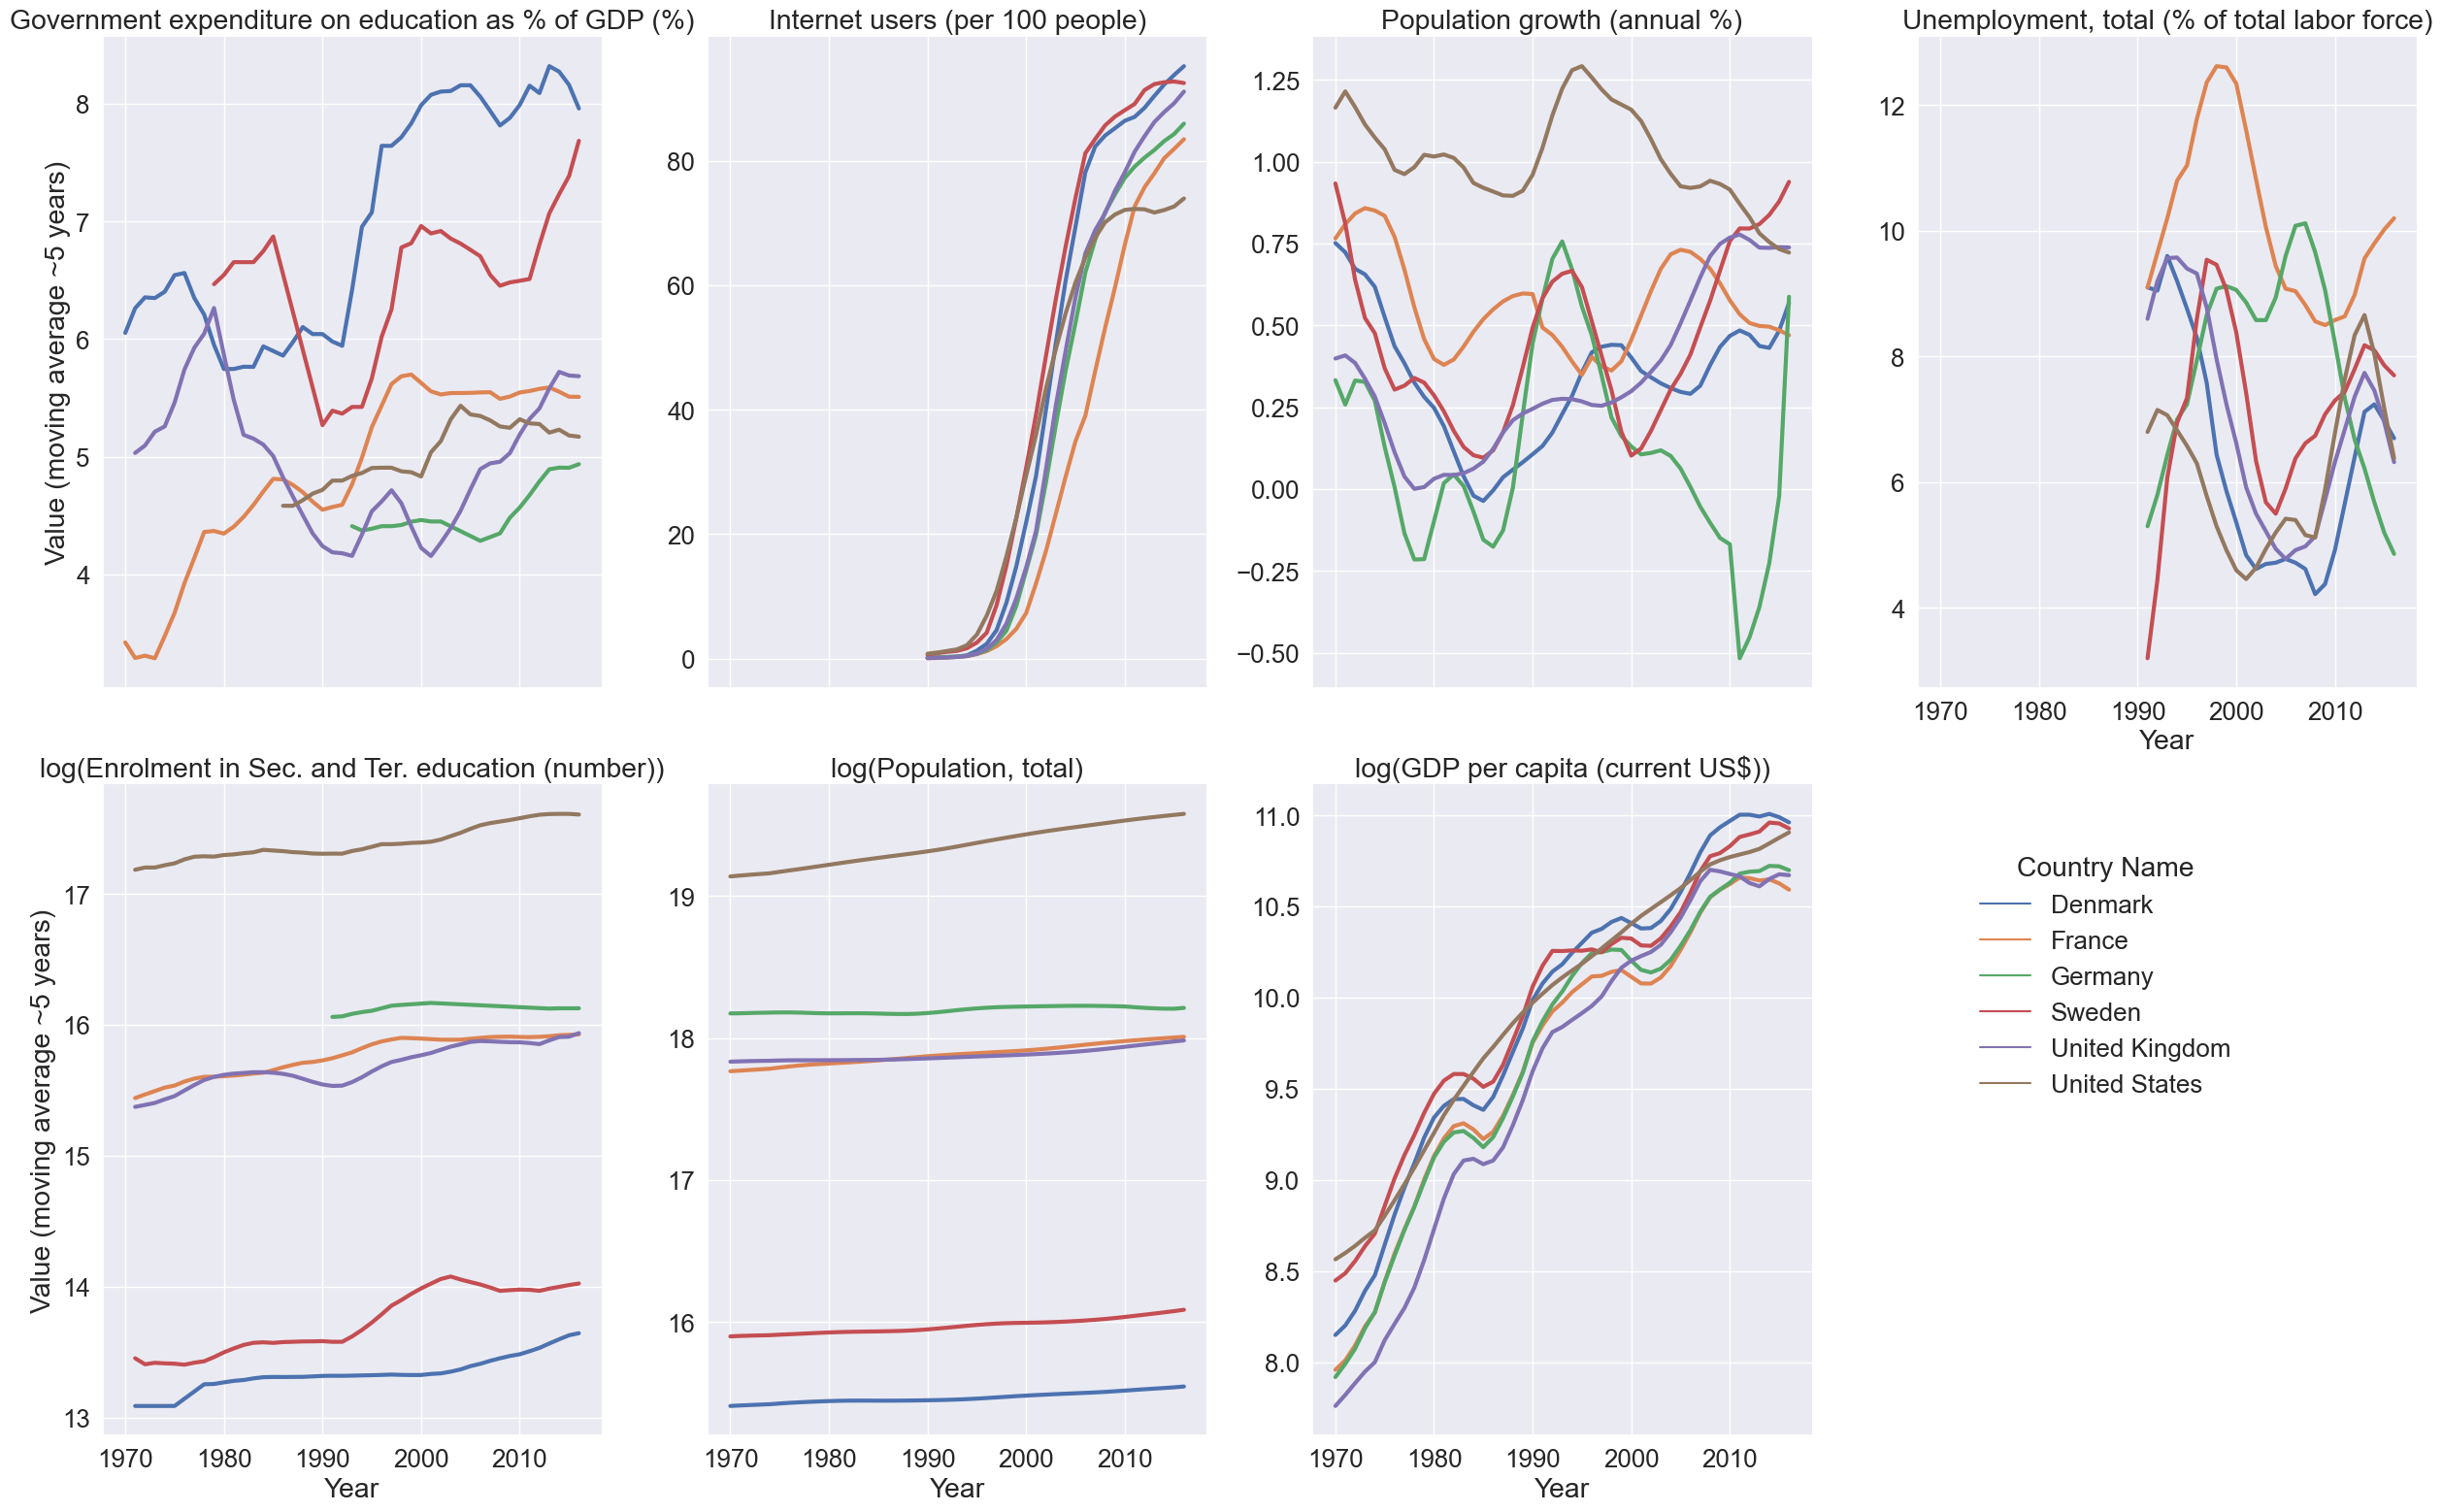

In [92]:
# Représentation graphique des séries temporelles par pays et par indicateur
sns.set(font_scale=1.7)


lm = sns.relplot(x='Year_Int', y='Value (moving average ~5 years)', col='Indicator Name', hue='Country Name', data=dataTempoCountryTidy, kind="line", facet_kws={'sharey': False, 'sharex': True},col_wrap=4,ci=None,lw=3,height=8, aspect=0.7)
fig = lm.fig

fig.axes[0].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[0])
fig.axes[1].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[1])
fig.axes[2].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[2])
fig.axes[3].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[3])
fig.axes[3].set_xlabel('Year')
fig.axes[4].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[4])
fig.axes[4].set_xlabel('Year')
fig.axes[5].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[5])
fig.axes[5].set_xlabel('Year')
fig.axes[6].set_title(list(dataTempoRegionTidy['Indicator Name'].unique())[6])
fig.axes[6].set_xlabel('Year')
sns.move_legend(lm, "upper left", bbox_to_anchor=(.80, .45))


plt.tight_layout()


In [93]:
# write a function to choose the best country for the company to expand to  based on the scores and the indicators
def best_country_to_expand_to(data, indicators, scores, country, region):
    # filter the data based on the country and the region
    data = data[(data['Country Name'] == country) & (data['Region'] == region)]
    # filter the data based on the indicators
    data = data[data['Indicator Name'].isin(indicators)]
    # filter the data based on the scores
    data = data[data['Score'] > scores]
    return data

In [94]:
# write a function to display the 10 best country to expand to as an Edtech company
def display_best_countries(data, indicators, scores, region):
    # create an empty list to store the best countries
    best_countries = []
    # loop through the countries in the region
    for country in data['Country Name'].unique():
        # get the best country to expand to
        best_country = best_country_to_expand_to(data, indicators, scores, country, region)
        # append the best country to the list
        best_countries.append(best_country)
    # concatenate the best countries
    best_countries = pd.concat(best_countries)
    return best_countries

In [95]:
# write a function that will print/show the 10 best country to expand to as an Edtech company depending all the indicators and the scores
def print_best_countries(data, indicators, scores, region):
    # get the best countries
    best_countries = display_best_countries(data, indicators, scores, region)
    # print the best countries
    print(best_countries)